### 导入数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, kendalltau, entropy
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei'] 
pd.set_option("display.max_rows", None)  # 显示所有行
pd.set_option("display.max_columns", None)  # 显示所有列

In [2]:
# Load File
file_path = "merged_yearly_stock_data_all.csv"
All_Stock_Info = pd.read_csv(file_path, low_memory=False)
print(All_Stock_Info.head())

   Year  stock_code    market_cap  price_day_return  Price_book_ratio  证券简称  \
0  2005           1  8.546441e+09          0.000718               NaN  平安银行   
1  2005           2  8.973876e+09          0.117611               NaN   万科A   
2  2005           4  2.098388e+08         -0.159844               NaN  国华网安   
3  2005           6  6.575989e+08          0.050141               NaN  深振业A   
4  2005           7  2.868370e+08          0.040888               NaN   全新好   

        上市日期  摘牌日期  所属Wind行业代码(2004) [行业级别] 一级行业  \
0   4/3/1991   NaN                            40   
1  1/29/1991   NaN                            60   
2  12/1/1990   NaN                            45   
3  4/27/1992   NaN                            60   
4  4/13/1992   NaN                            25   

   所属Wind行业代码(2004) [行业级别] 二级行业  所属Wind行业代码(2004) [行业级别] 三级行业  \
0                          4010                        401010   
1                          6010                        601020   
2                

In [3]:
# Industry code with name
# 定义映射表（一级行业代码 -> 中文行业名）
industry_map = {
    10: "10 Energy",
    15: "15 Materials",
    20: "20 Industrials",
    25: "25 Consumer Discretionary",
    30: "30 Consumer Staples",
    35: "35 Health Care",
    40: "40 Financials",
    45: "45 Information Technology",
    50: "50 Telecommunication Services",
    55: "55 Utilities",
    60: "60 Real Estate"
}

# 在df里新增一列：一级行业中文名
All_Stock_Info["一级行业名称"] = All_Stock_Info["所属Wind行业代码(2004) [行业级别] 一级行业"].map(industry_map)


In [4]:
# Overall coverage level coverage ratio
All_Stock_Info['有ESG评级'] = All_Stock_Info['ESG_Score'].notna()


# 包含ESG评级的公司：Firms Including ESG Ratings 
ESG_Stock_Info = All_Stock_Info[All_Stock_Info['有ESG评级'] == True]

### ESG coverage on stock level, and industry level

In [6]:
# 计算整体比例
overall_coverage = All_Stock_Info['有ESG评级'].mean()
print("整体ESG覆盖率：{:.2%}".format(overall_coverage))


整体ESG覆盖率：44.49%


In [7]:
# Industry Coverage Level 
# 按照一级行业代码分组，计算每个行业有ESG_Score的比例
industry_coverage = (
    All_Stock_Info.groupby("一级行业名称")['有ESG评级']
      .mean()
      .reset_index()
      .rename(columns={"has_esg": "ESG_Coverage"}))

print("\n行业层面覆盖率(Industry coverage ratio)：")
print(industry_coverage)


行业层面覆盖率(Industry coverage ratio)：
                           一级行业名称    有ESG评级
0                       10 Energy  0.650617
1                    15 Materials  0.481439
2                  20 Industrials  0.428281
3       25 Consumer Discretionary  0.467552
4             30 Consumer Staples  0.497683
5                  35 Health Care  0.417248
6                   40 Financials  0.520661
7       45 Information Technology  0.351297
8   50 Telecommunication Services  0.331250
9                    55 Utilities  0.596691
10                 60 Real Estate  0.761000


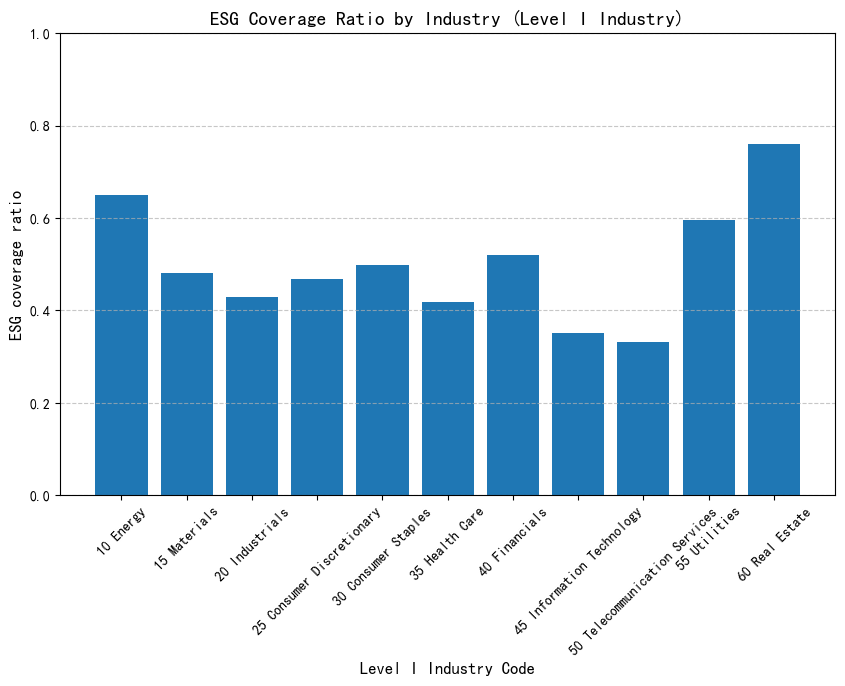

In [8]:
# 画柱状图
plt.figure(figsize=(10,6))
plt.bar(industry_coverage["一级行业名称"].astype(str),
        industry_coverage["有ESG评级"])

plt.title("ESG Coverage Ratio by Industry (Level I Industry)", fontsize=14)
plt.xlabel("Level I Industry Code", fontsize=12)
plt.ylabel("ESG coverage ratio", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

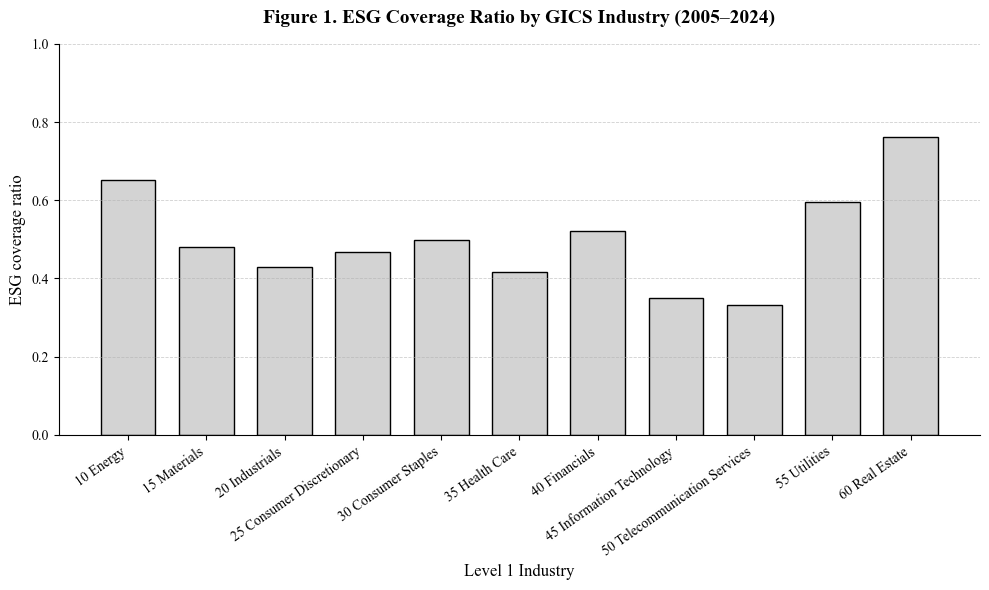

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 全局字体设置为 Times New Roman

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['axes.unicode_minus'] = False  # 防止负号乱码

# 创建图形
plt.figure(figsize=(10,6))
bars = plt.bar(
    industry_coverage["一级行业名称"].astype(str),
    industry_coverage["有ESG评级"],
    color="lightgray",  # 深蓝灰色，更学术
    edgecolor="black",
    width=0.7
)


# 图表标题与轴标签
plt.title("Figure 1. ESG Coverage Ratio by GICS Industry (2005–2024)", 
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Level 1 Industry", fontsize=12)
plt.ylabel("ESG coverage ratio", fontsize=12)

# x轴文字优化：斜体、旋转、美化
plt.xticks(rotation=35, ha='right', fontsize=10)

# y轴范围与网格线
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)

# 去掉边框顶部和右侧，让图更简洁
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

# 调整布局，避免文字被裁掉
plt.tight_layout()

# 显示图形
plt.savefig("Figure1_ESG_Coverage_Ratio.png", dpi=600, bbox_inches='tight')
plt.show()


In [10]:
# Different Year's Coverage Ratio ☀️
year_industry_coverage = (
    All_Stock_Info
      .groupby(["Year"])['有ESG评级']   # 注意是列表，两个列一起 groupby
      .mean()
      .reset_index()
      .rename(columns={'有ESG评级': 'ESG_Coverage'})
)

print("\n年份覆盖率(Industry coverage ratio)：")
print(year_industry_coverage)


年份覆盖率(Industry coverage ratio)：
    Year  ESG_Coverage
0   2005      0.000000
1   2006      0.000000
2   2007      0.275020
3   2008      0.286446
4   2009      0.313633
5   2010      0.379039
6   2011      0.425138
7   2012      0.449370
8   2013      0.459023
9   2014      0.481875
10  2015      0.520063
11  2016      0.581235
12  2017      0.651259
13  2018      0.671518
14  2019      0.717349
15  2020      0.821991
16  2021      0.907750
17  2022      0.954563
18  2023      0.000000
19  2024      0.000000


In [11]:
# Different Year's Industry Coverage Ratio
year_industry_coverage = (
    All_Stock_Info
      .groupby(["Year", "一级行业名称"])['有ESG评级']   # 注意是列表，两个列一起 groupby
      .mean()
      .reset_index()
      .rename(columns={'有ESG评级': 'ESG_Coverage'})
)

print("\n年份行业层面覆盖率(Industry coverage ratio)：")
print(year_industry_coverage.head())


年份行业层面覆盖率(Industry coverage ratio)：
   Year                     一级行业名称  ESG_Coverage
0  2005                  10 Energy           0.0
1  2005               15 Materials           0.0
2  2005             20 Industrials           0.0
3  2005  25 Consumer Discretionary           0.0
4  2005        30 Consumer Staples           0.0


In [12]:
# 构建透视表：行=Year，列=行业，值=覆盖率
coverage_trend_table = year_industry_coverage.pivot(
    index="Year",
    columns="一级行业名称",
    values="ESG_Coverage"
)

print("不同行业的年度 ESG 覆盖率趋势表：")
print(coverage_trend_table)


不同行业的年度 ESG 覆盖率趋势表：
一级行业名称  10 Energy  15 Materials  20 Industrials  25 Consumer Discretionary  \
Year                                                                         
2005     0.000000      0.000000        0.000000                   0.000000   
2006     0.000000      0.000000        0.000000                   0.000000   
2007     0.592593      0.326478        0.239082                   0.287356   
2008     0.617284      0.349614        0.250185                   0.293103   
2009     0.641975      0.370180        0.282013                   0.323276   
2010     0.691358      0.451157        0.350111                   0.382184   
2011     0.753086      0.489717        0.399704                   0.429598   
2012     0.765432      0.511568        0.420429                   0.465517   
2013     0.777778      0.515424        0.430052                   0.482759   
2014     0.790123      0.538560        0.458919                   0.505747   
2015     0.839506      0.569961        0.503

**Feedback**: 
* <span style = "color:red">Add industry-level plots (time series of ESG coverage by sector) to visualize uneven adoption.</span>

C:\Users\Vicky\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Vicky\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Vicky\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Vicky\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Vicky\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_

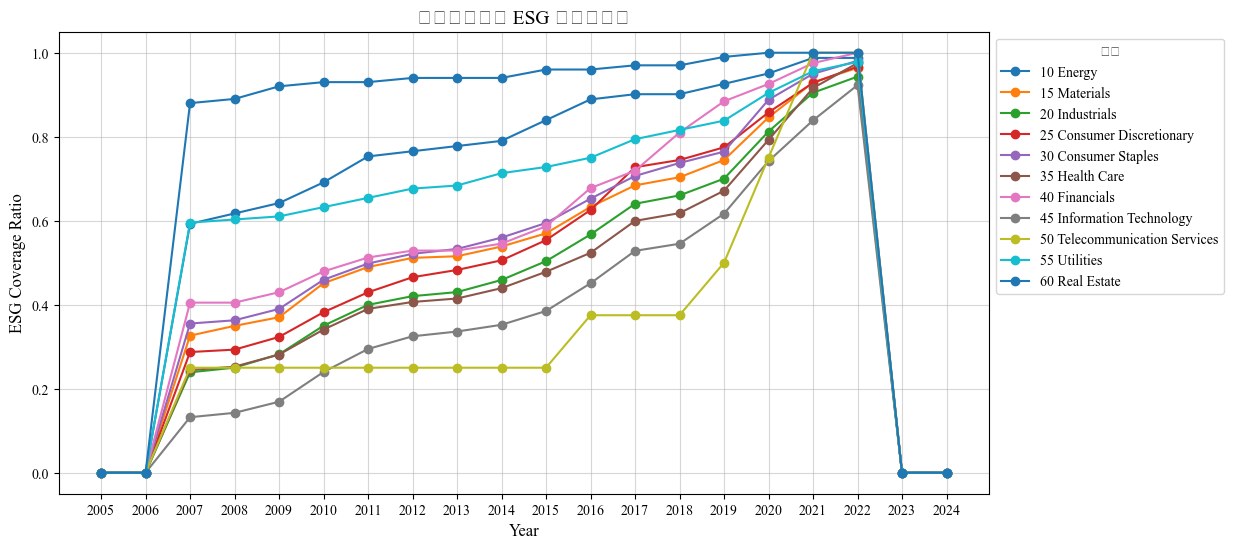

In [15]:
plt.figure(figsize=(12,6))
for col in coverage_trend_table.columns:
    plt.plot(coverage_trend_table.index, coverage_trend_table[col], marker="o", label=col)

plt.title("不同行业年度 ESG 覆盖率趋势", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("ESG Coverage Ratio", fontsize=12)
plt.legend(title="行业", bbox_to_anchor=(1, 1), loc="upper left")
plt.grid(alpha=0.5)
plt.xticks(ticks=coverage_trend_table.index, labels=coverage_trend_table.index.astype(int))


plt.show()


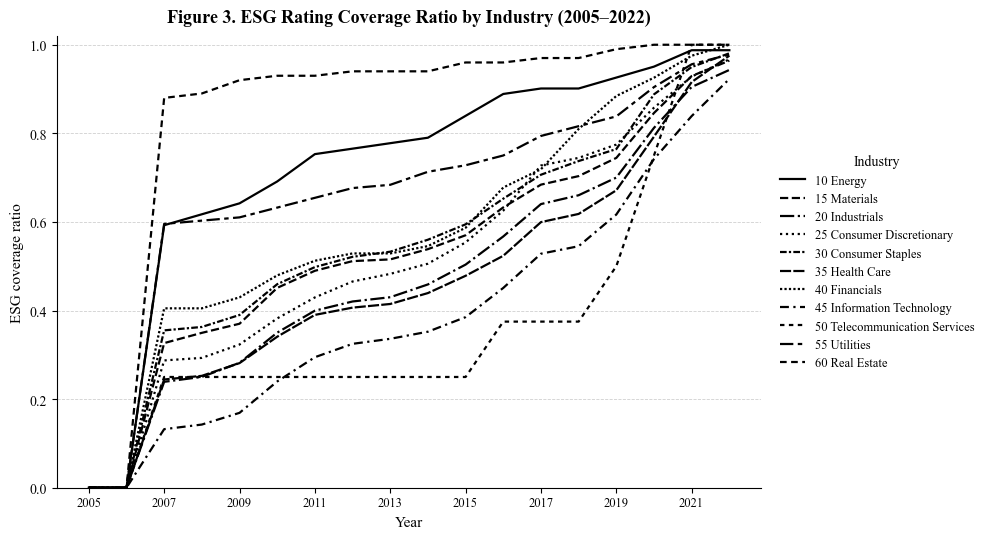

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# 1) 全局学术风设置
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["axes.unicode_minus"] = False

# 2) 若 2023/2024 为缺失导致的 0，替换为 NaN（避免图形“跳水”）
df_plot = coverage_trend_table.copy()
if np.issubdtype(df_plot.index.dtype, np.number):
    mask_recent = df_plot.index >= 2023
else:
    mask_recent = df_plot.index.astype(int) >= 2023
df_plot.loc[mask_recent] = df_plot.loc[mask_recent].replace(0, np.nan)

# 3) 线型循环（黑白打印友好）
linestyles = ["-", "--", "-.", ":", (0,(3,1,1,1)), (0,(5,1)), (0,(1,1)),
              (0,(4,2,1,2)), (0,(2,2)), (0,(6,2,2,2)), (0,(3,2))]

fig, ax = plt.subplots(figsize=(10,5.5))

for i, col in enumerate(df_plot.columns):
    ax.plot(
        df_plot.index, df_plot[col],
        linestyle=linestyles[i % len(linestyles)],
        linewidth=1.6, marker=None, label=str(col), color="black"
    )

# 4) 轴与网格
ax.set_title("Figure 3. ESG Rating Coverage Ratio by Industry (2005–2022)", 
             fontsize=13, fontweight="bold", pad=10)
ax.set_xlabel("Year", fontsize=11)
ax.set_ylabel("ESG coverage ratio", fontsize=11)
ax.set_ylim(0, 1.02)

# x 轴刻度（年份多时每两年一个刻度更清爽）
years = df_plot.index.astype(int)
xticks = np.arange(years.min(), min(years.max(), 2022) + 1, 2)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=9)

ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)

# 去掉上/右边框
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# 5) 图例：外置、单列、紧凑
leg = ax.legend(title="Industry", loc="center left", bbox_to_anchor=(1.01, 0.5),
                frameon=False, fontsize=9)
if leg.get_title():
    leg.get_title().set_fontsize(10)

fig.tight_layout()

# 6) 高分辨率保存（论文用）
# fig.savefig("Figure3_ESG_Coverage_By_Industry.pdf", dpi=600, bbox_inches="tight")
# fig.savefig("Figure3_ESG_Coverage_By_Industry.png", dpi=600, bbox_inches="tight")

plt.show()


C:\Users\Vicky\AppData\Local\Temp\ipykernel_27944\2260146586.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Greys")   # ⭐ 学术黑白风


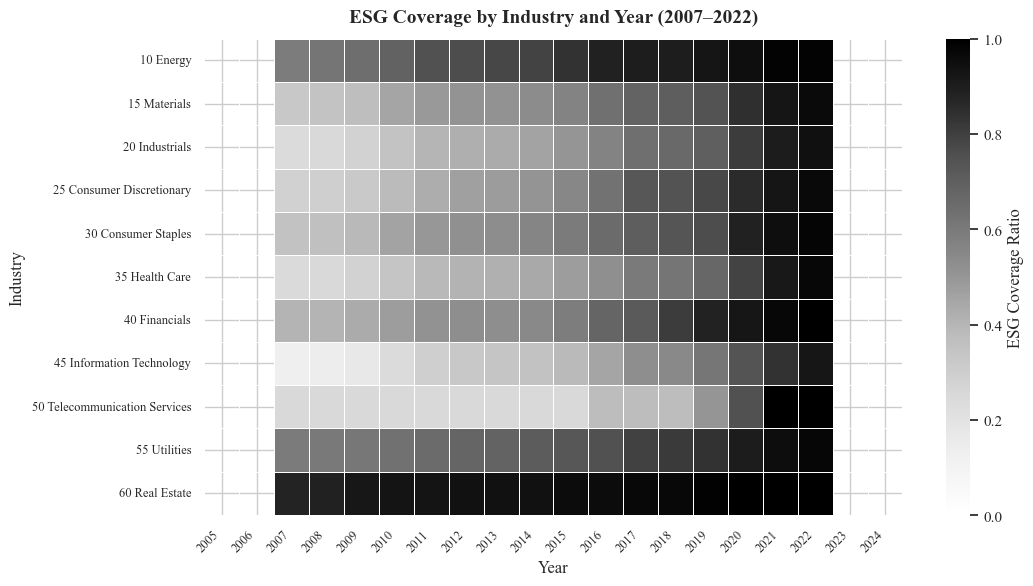

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib import cm   # ⭐ 关键点：使用 matplotlib.cm

# 1) 全局学术风设置
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["axes.unicode_minus"] = False

# df_heatmap: industry × year 的透视表，例如 coverage_trend_table.T
df_heatmap = coverage_trend_table.T.copy()

# 2) 将错误的 0 替换为 NaN
df_heatmap = df_heatmap.replace(0, np.nan)

# 3) 黑白灰度 colormap
cmap = cm.get_cmap("Greys")   # ⭐ 学术黑白风

# 4) 绘图
fig, ax = plt.subplots(figsize=(11, 6))

sns.heatmap(
    df_heatmap,
    cmap=cmap,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "ESG Coverage Ratio"},
    ax=ax,
    vmin=0, vmax=1
)

# 5) 标题与标签
ax.set_title(
    "ESG Coverage by Industry and Year (2007–2022)",
    fontsize=14, fontweight="bold", pad=12
)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Industry", fontsize=12)

plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)

# 6) 去掉顶部 & 右边框（更学术）
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
plt.show()


#### 平均增长率 ☀️

In [22]:
coverage_clean = coverage_trend_table.replace(0, np.nan).dropna(how="all")

growth_rates = {}
for col in coverage_clean.columns:
    series = coverage_clean[col].dropna()
    if len(series) > 1:
        start_year, end_year = series.index[0], series.index[-1]
        start_val, end_val = series.iloc[0], series.iloc[-1]
        years = end_year - start_year
        if years > 0 and start_val > 0:
            # 复合年均增长率 CAGR
            cagr = (end_val / start_val) ** (1 / years) - 1
            growth_rates[col] = cagr
        else:
            growth_rates[col] = np.nan
    else:
        growth_rates[col] = np.nan

# 转为 DataFrame 并排序
industry_growth = pd.DataFrame.from_dict(growth_rates, orient="index", columns=["Avg_Annual_Growth"])
industry_growth = industry_growth.sort_values("Avg_Annual_Growth", ascending=False)

# 计算整体平均增长率（全行业平均）
overall_growth = industry_growth["Avg_Annual_Growth"].mean()
industry_growth_sorted = industry_growth.sort_values("Avg_Annual_Growth", ascending=False)

print("各行业年度平均增长率：")
print(industry_growth_sorted)
print("\n全行业平均增长率：", overall_growth)

各行业年度平均增长率：
                               Avg_Annual_Growth
45 Information Technology               0.138303
50 Telecommunication Services           0.096825
35 Health Care                          0.096671
20 Industrials                          0.095809
25 Consumer Discretionary               0.084261
15 Materials                            0.074855
30 Consumer Staples                     0.070048
40 Financials                           0.062118
10 Energy                               0.034642
55 Utilities                            0.033613
60 Real Estate                          0.008559

全行业平均增长率： 0.0723365895072515


### ESG ratings of Industries

In [25]:
# 不同产业的平均 ESG 评级
industry_esg_rating = (
    ESG_Stock_Info
      .groupby("一级行业名称")['ESG_Score']
      .mean()
      .reset_index()
      .rename(columns={"ESG_Score": "Avg_ESG_Score"})
).sort_values("Avg_ESG_Score", ascending = False)

print("各产业的平均ESG评级：")
print(industry_esg_rating)

各产业的平均ESG评级：
                           一级行业名称  Avg_ESG_Score
4             30 Consumer Staples      33.697346
1                    15 Materials      30.536576
5                  35 Health Care      30.030145
0                       10 Energy      27.075343
3       25 Consumer Discretionary      23.716072
2                  20 Industrials      23.595918
9                    55 Utilities      22.832244
6                   40 Financials      22.731948
7       45 Information Technology      21.301525
10                 60 Real Estate      19.710009
8   50 Telecommunication Services      18.651064


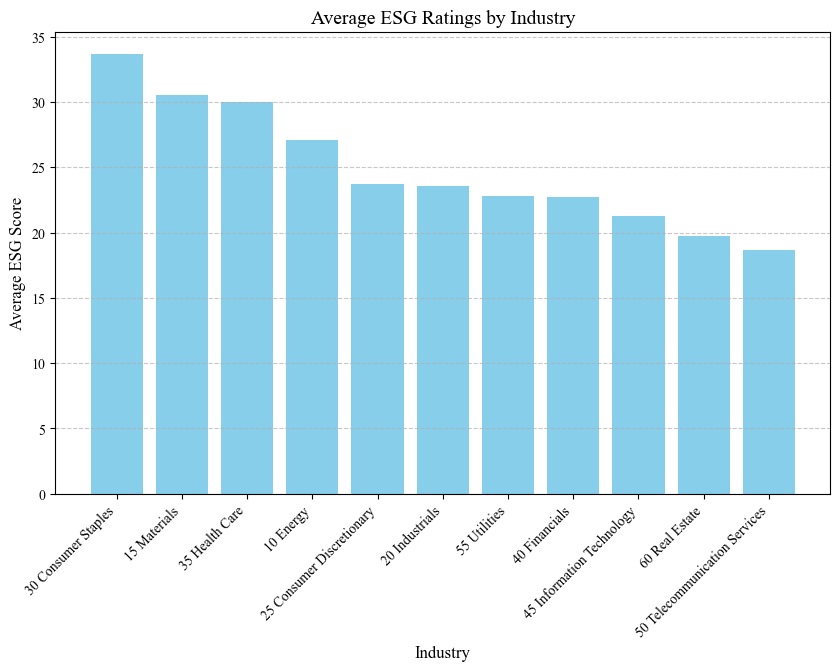

In [27]:
# 按行业平均ESG分数，可视化柱状图
plt.figure(figsize=(10,6))
plt.bar(industry_esg_rating["一级行业名称"], industry_esg_rating["Avg_ESG_Score"], color="skyblue")

plt.title("Average ESG Ratings by Industry", fontsize=14)
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Average ESG Score", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

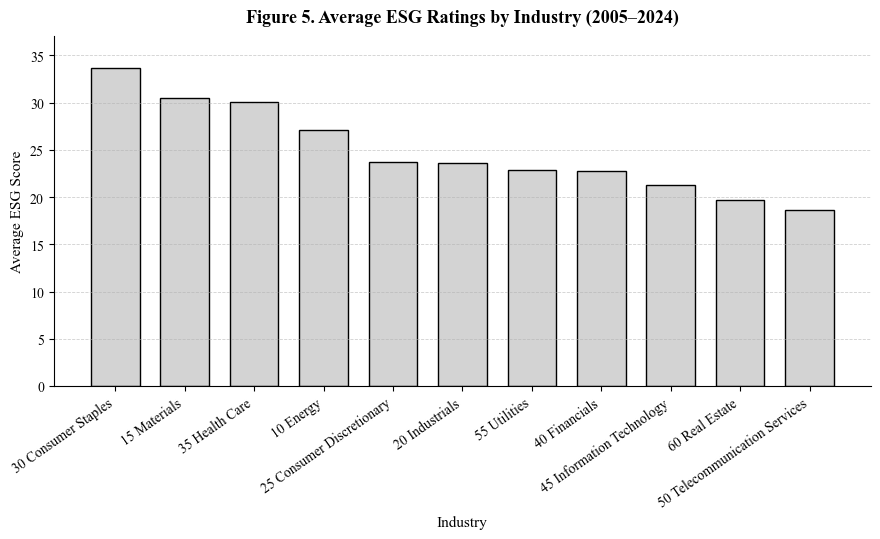

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 全局字体与风格
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['axes.unicode_minus'] = False

# 图形设置
plt.figure(figsize=(9,5.5))
bars = plt.bar(
    industry_esg_rating["一级行业名称"].astype(str),
    industry_esg_rating["Avg_ESG_Score"],
    color="lightgray", edgecolor="black", width=0.7
)

# 标题与坐标轴
plt.title("Figure 5. Average ESG Ratings by Industry (2005–2024)", fontsize=13, fontweight='bold', pad=10)
plt.xlabel("Industry", fontsize=11)
plt.ylabel("Average ESG Score", fontsize=11)

# 优化x轴标签
plt.xticks(rotation=35, ha="right", fontsize=10)

# 网格线
plt.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)
plt.ylim(0, max(industry_esg_rating["Avg_ESG_Score"])*1.1)

# 去掉顶部和右侧边框
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()

# 保存高分辨率图像（论文可用）
# plt.savefig("Figure5_Average_ESG_Rating_by_Industry.pdf", dpi=600, bbox_inches='tight')
# plt.savefig("Figure5_Average_ESG_Rating_by_Industry.png", dpi=600, bbox_inches='tight')

plt.show()


In [29]:
# 不同年份的平均 ESG 评级 ☀️
yearly_industry_esg_rating = (
    ESG_Stock_Info
      .groupby("Year")['ESG_Score']
      .mean()
      .reset_index()
      .rename(columns={"ESG_Score": "Avg_ESG_Score"})
).sort_values("Avg_ESG_Score", ascending = False).sort_values("Year")

print("各年度的平均ESG评级：")
print(yearly_industry_esg_rating)

各年度的平均ESG评级：
    Year  Avg_ESG_Score
0   2007      18.743808
1   2008      21.112156
2   2009      20.827627
3   2010      18.598837
4   2011      18.884455
5   2012      22.745980
6   2013      23.766710
7   2014      23.867070
8   2015      24.552434
9   2016      24.750430
10  2017      26.001423
11  2018      27.213936
12  2019      27.318415
13  2020      27.475510
14  2021      28.692600
15  2022      31.622178


In [30]:
# 取最早和最晚的年份及平均分数
start_year = yearly_industry_esg_rating["Year"].iloc[0]
end_year   = yearly_industry_esg_rating["Year"].iloc[-1]
start_val  = yearly_industry_esg_rating["Avg_ESG_Score"].iloc[0]
end_val    = yearly_industry_esg_rating["Avg_ESG_Score"].iloc[-1]

years = end_year - start_year

if years > 0 and start_val > 0:
    overall_cagr = (end_val / start_val) ** (1 / years) - 1
else:
    overall_cagr = None

print(f"起始年份: {start_year}, 结束年份: {end_year}")
print(f"起始平均分: {start_val:.2f}, 结束平均分: {end_val:.2f}")
print(f"年度平均增长率 (CAGR): {overall_cagr:.4f}")


起始年份: 2007, 结束年份: 2022
起始平均分: 18.74, 结束平均分: 31.62
年度平均增长率 (CAGR): 0.0355


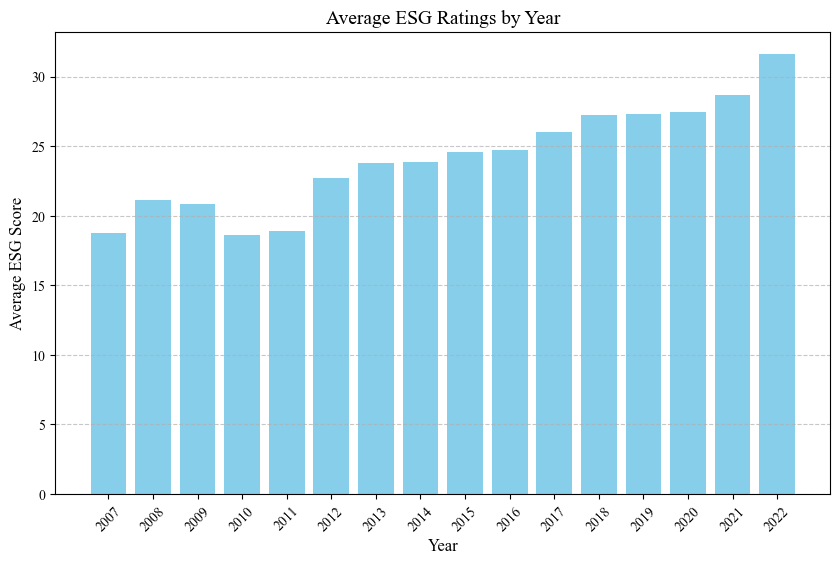

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(yearly_industry_esg_rating["Year"], yearly_industry_esg_rating["Avg_ESG_Score"], color="skyblue")

plt.title("Average ESG Ratings by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average ESG Score", fontsize=12)
plt.xticks(yearly_industry_esg_rating["Year"], rotation=45)  # 横轴标签年份
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


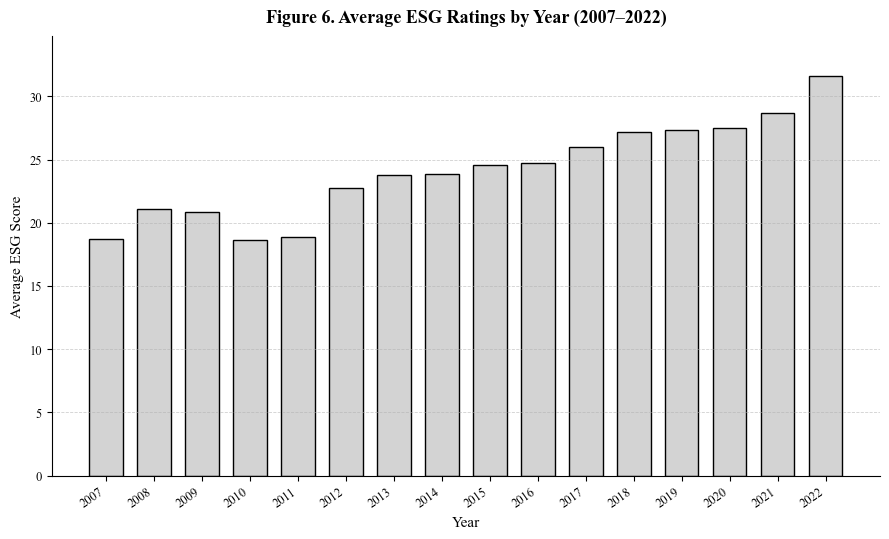

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 全局学术风格
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(9,5.5))

# 绘制图表（灰度、黑边框）
plt.bar(
    yearly_industry_esg_rating["Year"],
    yearly_industry_esg_rating["Avg_ESG_Score"],
    color="lightgray", edgecolor="black", width=0.7
)

# 标题与标签
plt.title("Figure 6. Average ESG Ratings by Year (2007–2022)", 
          fontsize=13, fontweight='bold', pad=10)
plt.xlabel("Year", fontsize=11)
plt.ylabel("Average ESG Score", fontsize=11)

# 坐标刻度优化
plt.xticks(yearly_industry_esg_rating["Year"], rotation=35, ha="right", fontsize=9)
plt.yticks(fontsize=9)

# 网格线
plt.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)

# 边框简化（去掉上、右边线）
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

# Y轴范围适度留白
plt.ylim(0, yearly_industry_esg_rating["Avg_ESG_Score"].max() * 1.1)

plt.tight_layout()

# 保存高分辨率图像（学术论文用）
# plt.savefig("Figure6_Average_ESG_Ratings_by_Year.pdf", dpi=600, bbox_inches='tight')
# plt.savefig("Figure6_Average_ESG_Ratings_by_Year.png", dpi=600, bbox_inches='tight')

plt.show()


In [33]:
# 不同行业年份的ESG评级
year_industry_esg_rating = (
    ESG_Stock_Info
      .groupby(["Year", "一级行业名称"])['ESG_Score']
      .mean()
      .reset_index()
      .rename(columns={"ESG_Score": "Avg_ESG_Score"})
)

print("不同年份，不同产业的平均ESG评级：")
print(year_industry_esg_rating)


不同年份，不同产业的平均ESG评级：
     Year                         一级行业名称  Avg_ESG_Score
0    2007                      10 Energy      20.177175
1    2007                   15 Materials      22.454220
2    2007                 20 Industrials      16.593741
3    2007      25 Consumer Discretionary      17.243425
4    2007            30 Consumer Staples      25.748075
5    2007                 35 Health Care      23.699709
6    2007                  40 Financials      14.552180
7    2007      45 Information Technology      15.743417
8    2007  50 Telecommunication Services      16.076000
9    2007                   55 Utilities      15.742442
10   2007                 60 Real Estate      14.460266
11   2008                      10 Energy      24.107522
12   2008                   15 Materials      23.821503
13   2008                 20 Industrials      19.522342
14   2008      25 Consumer Discretionary      19.456425
15   2008            30 Consumer Staples      27.605166
16   2008                 35 

In [34]:
# 构建透视表：行=Year，列=行业，值=平均ESG分数
trend_table = year_industry_esg_rating.pivot(
    index="Year",
    columns="一级行业名称",
    values="Avg_ESG_Score"
)

print("不同行业的年度 ESG 评级趋势表：")
print(trend_table)

不同行业的年度 ESG 评级趋势表：
一级行业名称  10 Energy  15 Materials  20 Industrials  25 Consumer Discretionary  \
Year                                                                         
2007    20.177175     22.454220       16.593741                  17.243425   
2008    24.107522     23.821503       19.522342                  19.456425   
2009    22.182437     24.624189       19.236038                  18.823466   
2010    20.722239     22.118039       16.923974                  17.156879   
2011    20.250852     22.609175       17.481304                  17.485019   
2012    23.419916     26.638778       20.988693                  21.380815   
2013    26.007143     27.995214       22.150462                  22.582873   
2014    26.570244     27.801398       22.387692                  22.592354   
2015    26.456682     28.967523       23.070507                  22.775811   
2016    26.884010     29.644269       23.378187                  23.074446   
2017    29.806379     31.284968       24.3349

C:\Users\Vicky\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Vicky\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Vicky\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Vicky\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Vicky\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_

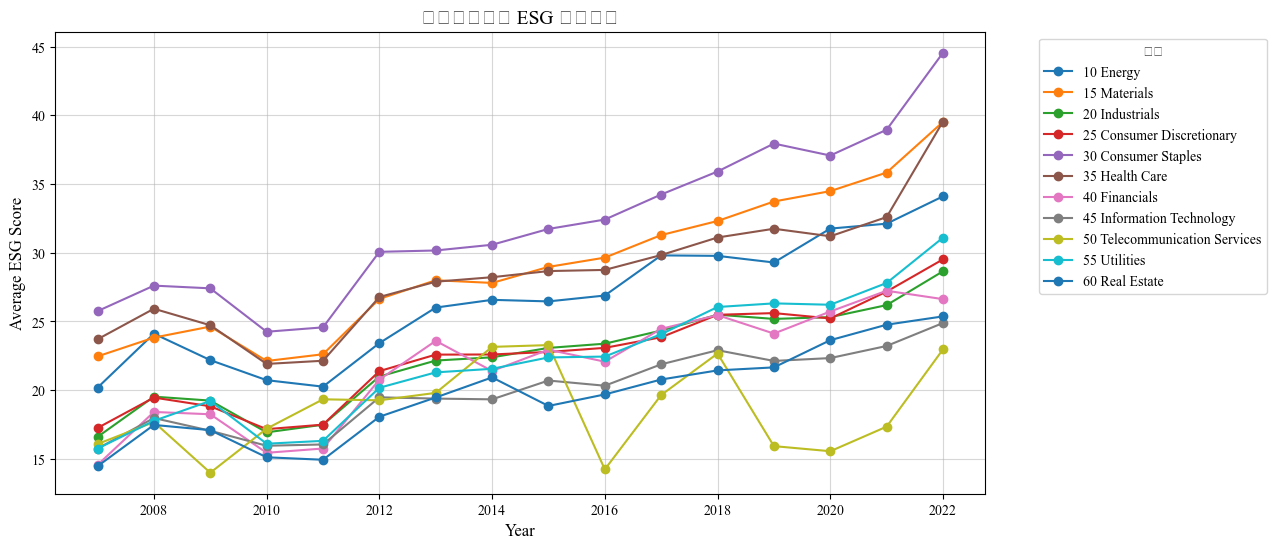

In [35]:

plt.figure(figsize=(12,6))
for col in trend_table.columns:
    plt.plot(trend_table.index, trend_table[col], marker="o", label=col)

plt.title("不同行业年度 ESG 评级趋势", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average ESG Score", fontsize=12)
plt.legend(title="行业", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.5)

plt.show()


C:\Users\Vicky\AppData\Local\Temp\ipykernel_27944\2077404053.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{t:.0f}" for t in ax.get_yticks()], fontsize=9)


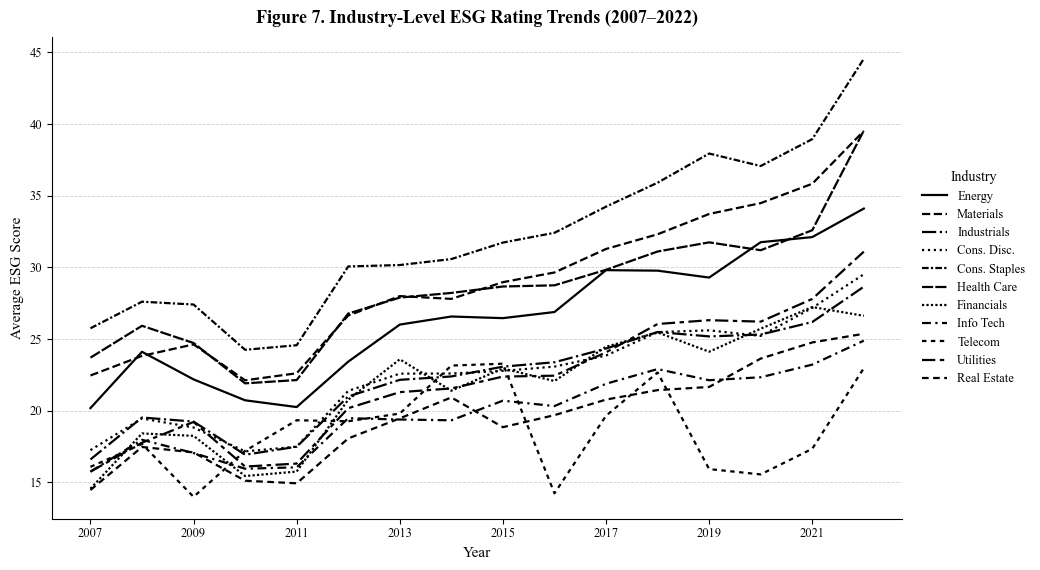

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# ====== 1) 全局学术风设置 ======
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['axes.unicode_minus'] = False

# （可选）把过长的行业名映射为缩写，label 更清爽
abbr = {
    "10 Energy": "Energy",
    "15 Materials": "Materials",
    "20 Industrials": "Industrials",
    "25 Consumer Discretionary": "Cons. Disc.",
    "30 Consumer Staples": "Cons. Staples",
    "35 Health Care": "Health Care",
    "40 Financials": "Financials",
    "45 Information Technology": "Info Tech",
    "50 Telecommunication Services": "Telecom",
    "55 Utilities": "Utilities",
    "60 Real Estate": "Real Estate",
}

# 如果你的列名里有中文+英文，下面这行会自动套用缩写，否则就用原列名
labels = [abbr.get(c, str(c)) for c in trend_table.columns]

# ====== 2) 线型/标记：黑白打印友好 ======
linestyles = ["-", "--", "-.", ":", (0,(3,1,1,1)), (0,(5,1)), (0,(1,1)),
              (0,(4,2,1,2)), (0,(2,2)), (0,(6,2,2,2)), (0,(3,2))]
markers = [None]*11  # 学术期刊常去 marker；如需保留可换为 'o','s','^',...

fig, ax = plt.subplots(figsize=(10.5,5.8))

# ====== 3) 绘制 ======
x = trend_table.index.astype(int)
for i, col in enumerate(trend_table.columns):
    ax.plot(
        x, trend_table[col].values,
        color="black",
        linestyle=linestyles[i % len(linestyles)],
        linewidth=1.6,
        marker=markers[i % len(markers)],
        label=labels[i]
    )

# ====== 4) 轴、标题、网格 ======
ax.set_title("Figure 7. Industry-Level ESG Rating Trends (2007–2022)",
             fontsize=13, fontweight="bold", pad=10)
ax.set_xlabel("Year", fontsize=11)
ax.set_ylabel("Average ESG Score", fontsize=11)

# x 轴每两年一个刻度更清爽
xticks = np.arange(x.min(), x.max()+1, 2)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=9)
ax.set_yticklabels([f"{t:.0f}" for t in ax.get_yticks()], fontsize=9)

ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)

# 去掉上/右边框
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# ====== 5) 图例外置、紧凑 ======
leg = ax.legend(title="Industry", loc="center left",
                bbox_to_anchor=(1.01, 0.5), frameon=False, fontsize=9, ncol=1)
if leg.get_title():
    leg.get_title().set_fontsize(10)

fig.tight_layout()

# ====== 6) 高分辨率保存（投稿友好） ======
# fig.savefig("Figure7_ESG_Rating_Trends_By_Industry.pdf", dpi=600, bbox_inches="tight")
# fig.savefig("Figure7_ESG_Rating_Trends_By_Industry.png", dpi=600, bbox_inches="tight")

plt.show()


In [39]:
# Growth Rate of different industries' ESG score☀️
# 清洗掉全是 NaN 的行业/年份
trend_clean = trend_table.dropna(how="all")

growth_rates = {}
for col in trend_clean.columns:
    series = trend_clean[col].dropna()
    if len(series) > 1:
        start_year, end_year = series.index[0], series.index[-1]
        start_val, end_val = series.iloc[0], series.iloc[-1]
        years = end_year - start_year
        if years > 0 and start_val > 0:
            cagr = (end_val / start_val) ** (1 / years) - 1
            growth_rates[col] = cagr
        else:
            growth_rates[col] = np.nan
    else:
        growth_rates[col] = np.nan

# 转为 DataFrame，排序
industry_esg_growth = pd.DataFrame.from_dict(
    growth_rates, orient="index", columns=["Avg_Annual_Growth"]
).sort_values("Avg_Annual_Growth", ascending=False)

# 计算全行业平均增长率
overall_esg_growth = industry_esg_growth["Avg_Annual_Growth"].mean()

print("各行业年度平均 ESG 分数增长率：")
print(industry_esg_growth)
print("\n全行业平均增长率：", overall_esg_growth)

各行业年度平均 ESG 分数增长率：
                               Avg_Annual_Growth
55 Utilities                            0.046432
40 Financials                           0.041084
15 Materials                            0.038416
60 Real Estate                          0.038177
30 Consumer Staples                     0.037240
20 Industrials                          0.037082
25 Consumer Discretionary               0.036489
10 Energy                               0.035611
35 Health Care                          0.034730
45 Information Technology               0.030990
50 Telecommunication Services           0.024066

全行业平均增长率： 0.03639255162638142


### E, S, G rating of industries：不同产业的E，S，和G评级

In [43]:
# # 定义公式
# def industry_overall_rating(df, score_col, industry_col="一级行业名称"):
#     """总体：按行业计算平均分"""
#     out = (
#         df[df[score_col].notna()]
#         .groupby(industry_col)[score_col]
#         .mean()
#         .reset_index()
#         .rename(columns={score_col: "AvgScore"})
#         .sort_values("AvgScore", ascending=False)
#     )
#     return out

# def industry_yearly_rating(df, score_col, industry_col="一级行业名称"):
#     """分年份：按 年份 + 行业 计算平均分，并给出趋势透视表"""
#     tmp = (
#         df[df[score_col].notna()]
#         .groupby(["Year", industry_col])[score_col]
#         .mean()
#         .reset_index()
#         .rename(columns={score_col: "AvgScore"})
#     )
#     trend = tmp.pivot(index="Year", columns=industry_col, values="AvgScore").sort_index()
#     return tmp, trend

# def plot_overall_bar(df_overall, title="Average Rating by Industry", xcol="一级行业名称"):
#     """总体柱状图"""
#     plt.figure(figsize=(10,6))
#     plt.bar(df_overall[xcol], df_overall["AvgScore"])
#     plt.title(title, fontsize=14)
#     plt.xlabel("Industry", fontsize=12)
#     plt.ylabel("Average Score", fontsize=12)
#     plt.xticks(rotation=45, ha="right")
#     plt.grid(axis="y", linestyle="--", alpha=0.7)
#     plt.show()

# def plot_yearly_trend(trend_table, title="Yearly Industry Rating Trend"):
#     """年度趋势折线图（横轴仅显示整数年份）"""
#     # 年份尽量用整数刻度
#     try:
#         trend_table = trend_table.copy()
#         trend_table.index = trend_table.index.astype(int)
#     except Exception:
#         pass
#     plt.figure(figsize=(12,6))
#     for col in trend_table.columns:
#         plt.plot(trend_table.index, trend_table[col], marker="o", label=col)
#     plt.title(title, fontsize=14)
#     plt.xlabel("Year", fontsize=12)
#     plt.ylabel("Average Score", fontsize=12)
#     plt.xticks(trend_table.index)  # 以年为间隔
#     plt.grid(alpha=0.5)
#     plt.legend(title="行业", bbox_to_anchor=(1,1), loc="upper left")
#     plt.show()

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# ========== 0) 全局学术风 ========== #
def set_academic_rc():
    mpl.rcParams['font.family'] = 'Times New Roman'
    mpl.rcParams['axes.unicode_minus'] = False
    mpl.rcParams['axes.spines.top'] = False
    mpl.rcParams['axes.spines.right'] = False

set_academic_rc()

# ========== 1) 数据函数（你的逻辑保持不变，仅做健壮性小增强） ========== #
def industry_overall_rating(df, score_col, industry_col="一级行业名称"):
    """总体：按行业计算平均分"""
    out = (
        df[df[score_col].notna()]
        .groupby(industry_col, dropna=False)[score_col]
        .mean()
        .reset_index()
        .rename(columns={score_col: "AvgScore"})
        .sort_values("AvgScore", ascending=False)
    )
    return out

def industry_yearly_rating(df, score_col, industry_col="一级行业名称"):
    """分年份：按 年份 + 行业 计算平均分，并给出趋势透视表"""
    tmp = (
        df[df[score_col].notna()]
        .groupby(["Year", industry_col], dropna=False)[score_col]
        .mean()
        .reset_index()
        .rename(columns={score_col: "AvgScore"})
    )
    # 年份转 int，避免 x 轴出现小数刻度
    tmp["Year"] = tmp["Year"].astype(int)
    trend = tmp.pivot(index="Year", columns=industry_col, values="AvgScore").sort_index()
    return tmp, trend

# ========== 2) 可视化函数（期刊风） ========== #
_ABBR = {
    "25 Consumer Discretionary": "Cons. Disc.",
    "30 Consumer Staples": "Cons. Staples",
    "45 Information Technology": "Info Tech",
    "50 Telecommunication Services": "Telecom",
}

def _map_label(lbl: str) -> str:
    s = str(lbl)
    return _ABBR.get(s, s)

def plot_overall_bar(df_overall,
                     title="Average Rating by Industry",
                     xcol="一级行业名称", ycol="AvgScore",
                     save=None):
    """
    总体柱状图（学术风）
    - 灰阶填充 + 黑边框（黑白打印友好）
    - Times New Roman、去右上边框、虚线网格
    - 可选高分辨率保存：save='Figure8_ESG_E.pdf' 或 '.png'
    """
    # 兼容不同列名
    if xcol not in df_overall.columns:
        # 尝试自动猜测
        for cand in ["Industry", "一级行业名称", "行业名称"]:
            if cand in df_overall.columns:
                xcol = cand; break
    if ycol not in df_overall.columns:
        for cand in ["AvgScore", "Average_Score", "Avg_ESG_Score"]:
            if cand in df_overall.columns:
                ycol = cand; break

    x = df_overall[xcol].map(_map_label)
    y = df_overall[ycol].values

    fig, ax = plt.subplots(figsize=(9, 5.5))
    ax.bar(x, y, color="lightgray", edgecolor="black", width=0.7)
    ax.set_title(title, fontsize=13, fontweight="bold", pad=10)
    ax.set_xlabel("Industry", fontsize=11)
    ax.set_ylabel("Average Score", fontsize=11)
    ax.set_ylim(0, max(y) * 1.12)
    ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)
    plt.xticks(rotation=35, ha="right", fontsize=9)
    plt.yticks(fontsize=9)
    fig.tight_layout()

    if save:
        fig.savefig(save, dpi=600, bbox_inches="tight")
    plt.show()

def plot_yearly_trend(trend_table,
                      title="Yearly Industry Rating Trend",
                      treat_zero_as_missing_after=2022,
                      xtick_step=2,
                      save=None):
    """
    年度趋势折线图（学术风）
    - 线型区分行业（黑白打印友好）
    - 可选择将 2023/2024 的 0 视为缺失（数据库未更新导致）
    """
    tbl = trend_table.copy()
    try:
        tbl.index = tbl.index.astype(int)
    except Exception:
        pass

    # 将后期“0”视为缺失（可关闭：传 None）
    if treat_zero_as_missing_after is not None:
        mask = tbl.index >= int(treat_zero_as_missing_after + 1)
        if mask.any():
            tbl.loc[mask] = tbl.loc[mask].replace(0, np.nan)

    linestyles = ["-", "--", "-.", ":", (0,(3,1,1,1)), (0,(5,1)),
                  (0,(1,1)), (0,(4,2,1,2)), (0,(2,2)), (0,(6,2,2,2)), (0,(3,2))]

    fig, ax = plt.subplots(figsize=(10.5, 5.8))
    for i, col in enumerate(tbl.columns):
        ax.plot(
            tbl.index, tbl[col].values,
            color="black",
            linestyle=linestyles[i % len(linestyles)],
            linewidth=1.6,
            label=_map_label(col)
        )

    ax.set_title(title, fontsize=13, fontweight="bold", pad=10)
    ax.set_xlabel("Year", fontsize=11)
    ax.set_ylabel("Average Score", fontsize=11)
    # x 轴每两年一个刻度（可改 xtick_step=1/2/3）
    years = tbl.index.values
    xticks = np.arange(years.min(), years.max()+1, xtick_step)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, fontsize=9)
    ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    leg = ax.legend(title="Industry", loc="center left",
                    bbox_to_anchor=(1.01, 0.5), frameon=False, fontsize=9)
    if leg.get_title():
        leg.get_title().set_fontsize(10)

    fig.tight_layout()
    if save:
        fig.savefig(save, dpi=600, bbox_inches="tight")
    plt.show()


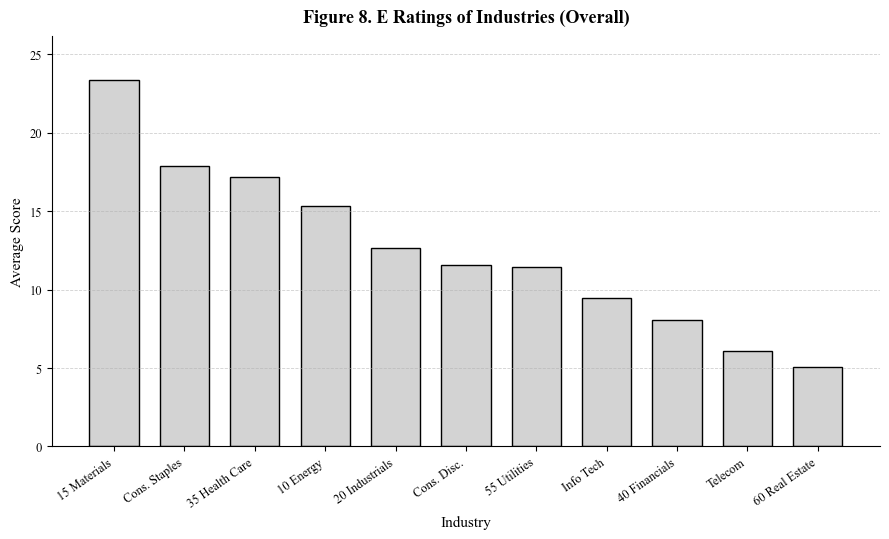

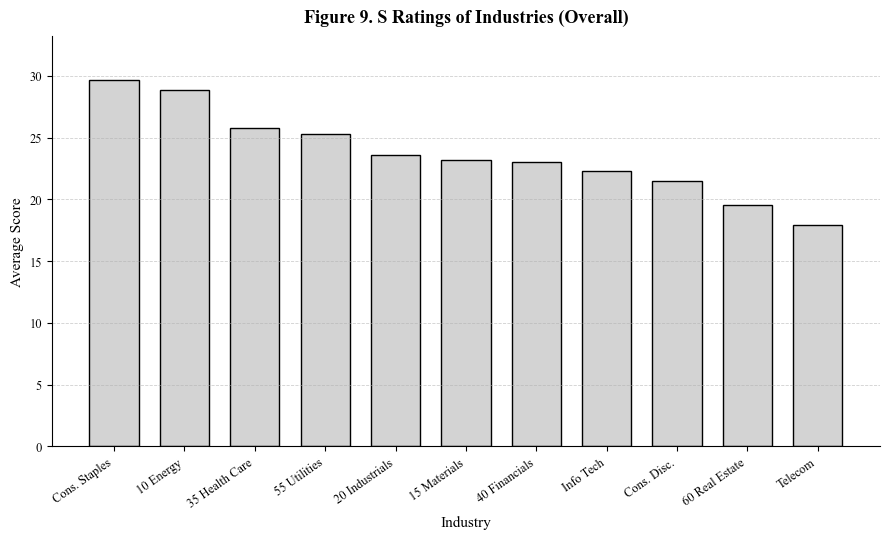

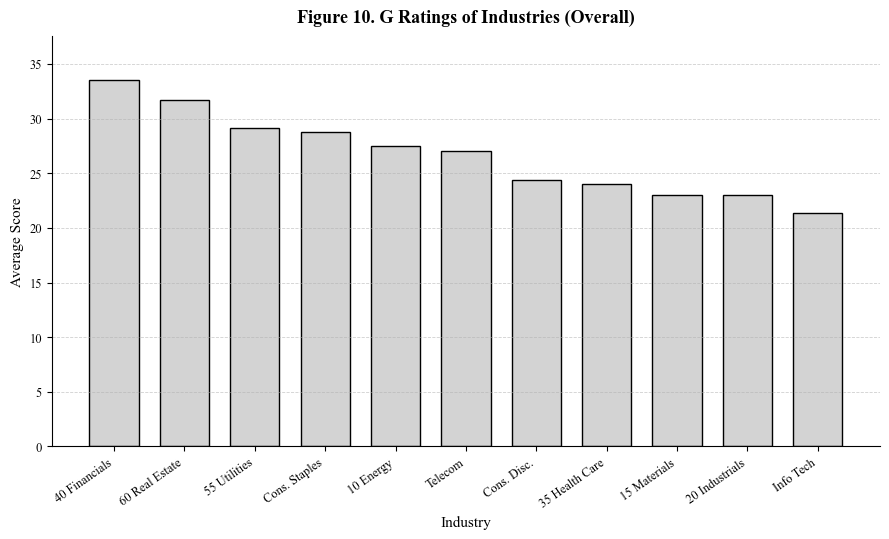

In [57]:
# E/S/G 总体柱状图
E_overall, _ = industry_yearly_rating(ESG_Stock_Info, "E_Score")  # 只是为了确保 Year 是 int
E_overall = industry_overall_rating(ESG_Stock_Info, "E_Score")
plot_overall_bar(E_overall, title="Figure 8. E Ratings of Industries (Overall)",
                 save=None)  # 或 'Figure8_E.pdf'

S_overall = industry_overall_rating(ESG_Stock_Info, "S_Score")
plot_overall_bar(S_overall, title="Figure 9. S Ratings of Industries (Overall)")

G_overall = industry_overall_rating(ESG_Stock_Info, "G_Score")
plot_overall_bar(G_overall, title="Figure 10. G Ratings of Industries (Overall)")

# 年度趋势（例如 ESG 总评分的行业趋势表 trend_table）
# plot_yearly_trend(trend_table, title="Figure 7. Industry-Level ESG Rating Trends (2007–2022)",
#                   treat_zero_as_missing_after=2022, save=None)


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# ========== 0) 全局学术风 ==========
def set_academic_rc():
    mpl.rcParams['font.family'] = 'Times New Roman'
    mpl.rcParams['axes.unicode_minus'] = False
    mpl.rcParams['axes.spines.top'] = False
    mpl.rcParams['axes.spines.right'] = False
set_academic_rc()

# ========== 1) 数据函数（你的逻辑保留） ==========
def industry_overall_rating(df, score_col, industry_col="一级行业名称"):
    """总体：按行业计算平均分"""
    out = (
        df[df[score_col].notna()]
        .groupby(industry_col, dropna=False)[score_col]
        .mean()
        .reset_index()
        .rename(columns={score_col: "AvgScore"})
        .sort_values("AvgScore", ascending=False)
    )
    return out

def industry_yearly_rating(df, score_col, industry_col="一级行业名称"):
    """分年份：按 年份 + 行业 计算平均分，并给出趋势透视表"""
    tmp = (
        df[df[score_col].notna()]
        .groupby(["Year", industry_col], dropna=False)[score_col]
        .mean()
        .reset_index()
        .rename(columns={score_col: "AvgScore"})
    )
    tmp["Year"] = tmp["Year"].astype(int)
    trend = tmp.pivot(index="Year", columns=industry_col, values="AvgScore").sort_index()
    return tmp, trend

# ========== 2) 可视化函数（期刊风） ==========
_ABBR = {
    "25 Consumer Discretionary": "Cons. Disc.",
    "30 Consumer Staples": "Cons. Staples",
    "45 Information Technology": "Info Tech",
    "50 Telecommunication Services": "Telecom",
}
def _map_label(lbl: str) -> str:
    s = str(lbl)
    return _ABBR.get(s, s)

def plot_overall_bar(df_overall, title="Average Rating by Industry",
                     xcol="一级行业名称", ycol="AvgScore", save=None):
    """总体柱状图（学术风 & 兼容中英文列名）"""
    if xcol not in df_overall.columns:
        for cand in ["Industry", "一级行业名称", "行业名称"]:
            if cand in df_overall.columns:
                xcol = cand; break
    if ycol not in df_overall.columns:
        for cand in ["AvgScore", "Average_Score", "Avg_ESG_Score"]:
            if cand in df_overall.columns:
                ycol = cand; break

    x = df_overall[xcol].map(_map_label)
    y = df_overall[ycol].values

    fig, ax = plt.subplots(figsize=(9, 5.5))
    ax.bar(x, y, color="lightgray", edgecolor="black", width=0.7)
    ax.set_title(title, fontsize=13, fontweight="bold", pad=10)
    ax.set_xlabel("Industry", fontsize=11)
    ax.set_ylabel("Average Score", fontsize=11)
    ax.set_ylim(0, max(y) * 1.12)
    ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)
    plt.xticks(rotation=35, ha="right", fontsize=9)
    plt.yticks(fontsize=9)
    fig.tight_layout()
    if save:
        fig.savefig(save, dpi=600, bbox_inches="tight")
    plt.show()

def plot_yearly_trend(trend_table, title="Yearly Industry Rating Trend",
                      treat_zero_as_missing_after=2022, xtick_step=2, save=None):
    """
    年度趋势折线图（学术风，黑白线型区分）
    - treat_zero_as_missing_after: 将该年之后的 0 视为缺失（None 关闭）
    - xtick_step: x 轴刻度间隔（默认每 2 年一个刻度）
    """
    tbl = trend_table.copy()
    try:
        tbl.index = tbl.index.astype(int)
    except Exception:
        pass

    if treat_zero_as_missing_after is not None:
        mask = tbl.index >= int(treat_zero_as_missing_after + 1)
        if mask.any():
            tbl.loc[mask] = tbl.loc[mask].replace(0, np.nan)

    linestyles = ["-", "--", "-.", ":", (0,(3,1,1,1)), (0,(5,1)),
                  (0,(1,1)), (0,(4,2,1,2)), (0,(2,2)), (0,(6,2,2,2)), (0,(3,2))]

    fig, ax = plt.subplots(figsize=(10.5, 5.8))
    for i, col in enumerate(tbl.columns):
        ax.plot(
            tbl.index, tbl[col].values,
            color="black",
            linestyle=linestyles[i % len(linestyles)],
            linewidth=1.6,
            label=_map_label(col)
        )

    ax.set_title(title, fontsize=13, fontweight="bold", pad=10)
    ax.set_xlabel("Year", fontsize=11)
    ax.set_ylabel("Average Score", fontsize=11)
    yrs = tbl.index.values
    xticks = np.arange(yrs.min(), yrs.max()+1, xtick_step)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, fontsize=9)
    ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    leg = ax.legend(title="Industry", loc="center left",
                    bbox_to_anchor=(1.01, 0.5), frameon=False, fontsize=9)
    if leg.get_title():
        leg.get_title().set_fontsize(10)

    fig.tight_layout()
    if save:
        fig.savefig(save, dpi=600, bbox_inches="tight")
    plt.show()


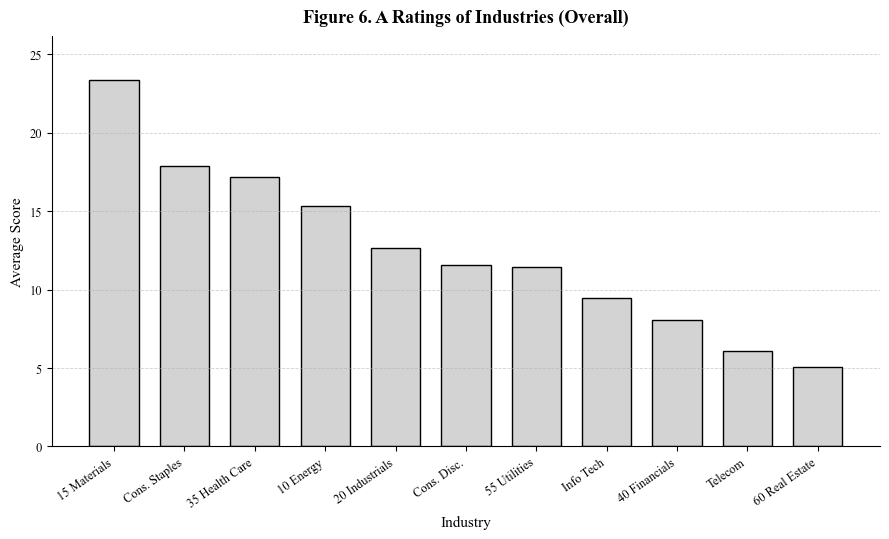

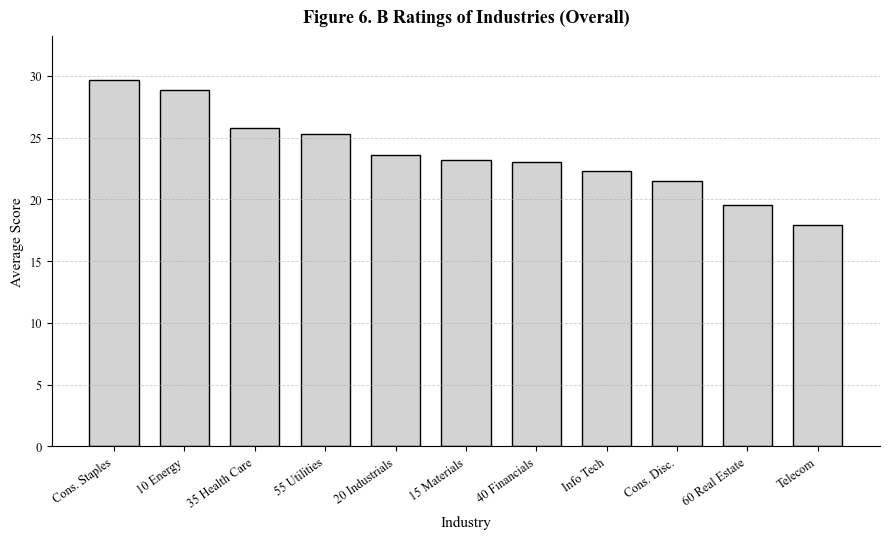

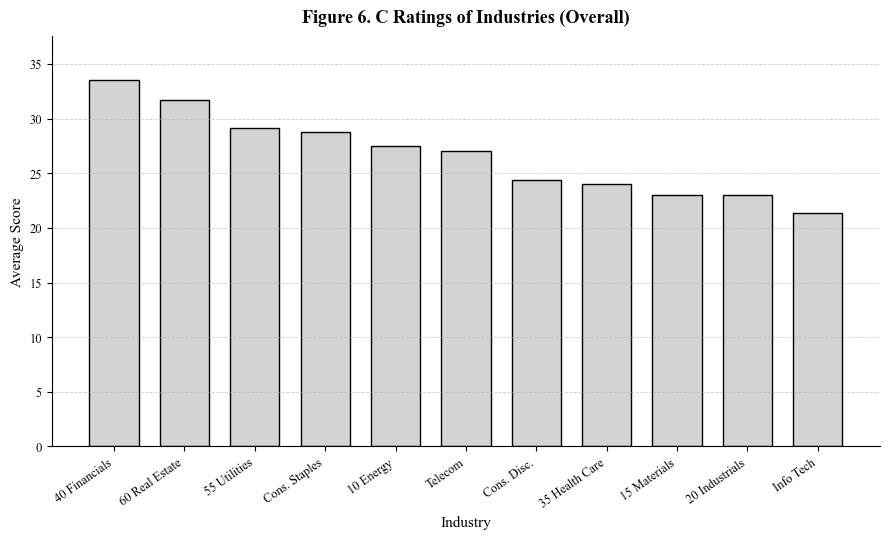

In [59]:
# E/S/G 三张总体图
E_overall = industry_overall_rating(ESG_Stock_Info, "E_Score")
plot_overall_bar(E_overall, "Figure 6. A Ratings of Industries (Overall)")

S_overall = industry_overall_rating(ESG_Stock_Info, "S_Score")
plot_overall_bar(S_overall, "Figure 6. B Ratings of Industries (Overall)")

G_overall = industry_overall_rating(ESG_Stock_Info, "G_Score")
plot_overall_bar(G_overall, "Figure 6. C Ratings of Industries (Overall)")

# 年度行业趋势（例如 ESG 总评分的 trend 表）
# plot_yearly_trend(trend_table, "Figure 7. Industry-Level ESG Rating Trends (2007–2022)",
#                   treat_zero_as_missing_after=2022, xtick_step=2)


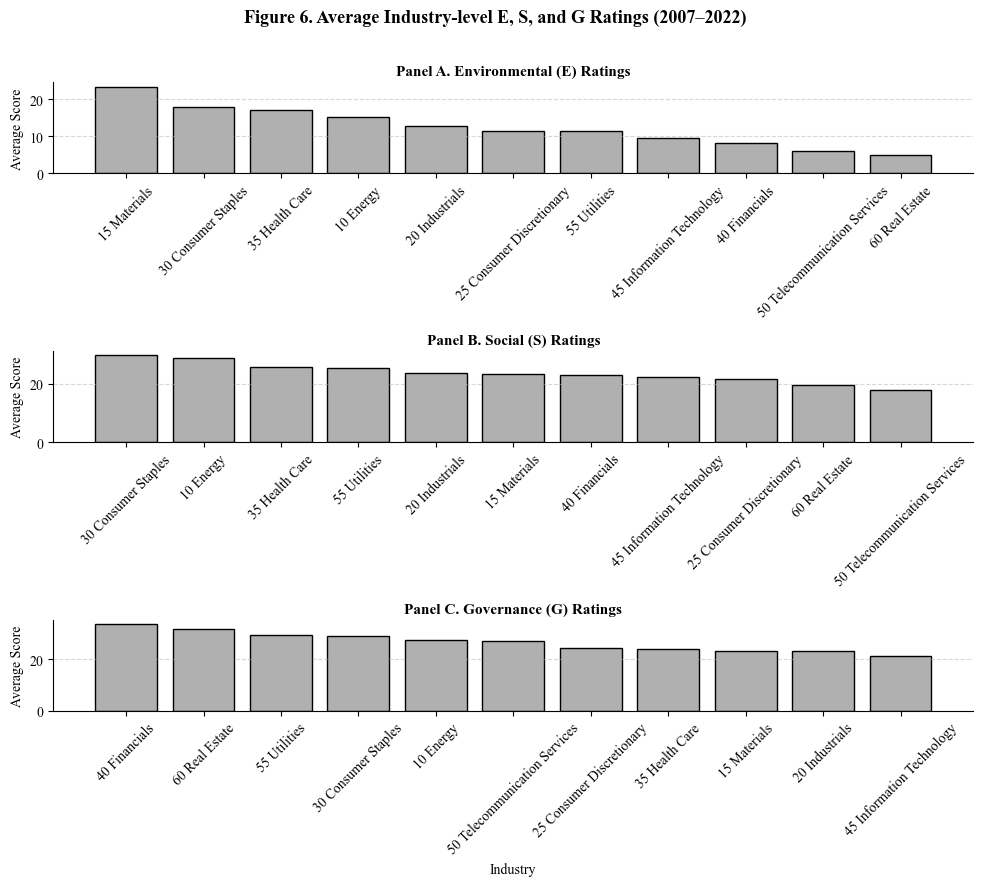

In [62]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(10, 9))  # ⬆️ 高度从 7.5 调整为 9
bar_color = "#b0b0b0"

# Panel A: E
axes[0].bar(E_overall["一级行业名称"], E_overall["AvgScore"], color=bar_color, edgecolor="black")
axes[0].set_title("Panel A. Environmental (E) Ratings", fontsize=11, fontweight="bold", pad=5)
axes[0].set_ylabel("Average Score", fontsize=10)
axes[0].set_xlabel("")
axes[0].tick_params(axis="x", rotation=45)
axes[0].grid(axis="y", linestyle="--", alpha=0.5)

# Panel B: S
axes[1].bar(S_overall["一级行业名称"], S_overall["AvgScore"], color=bar_color, edgecolor="black")
axes[1].set_title("Panel B. Social (S) Ratings", fontsize=11, fontweight="bold", pad=5)
axes[1].set_ylabel("Average Score", fontsize=10)
axes[1].set_xlabel("")
axes[1].tick_params(axis="x", rotation=45)
axes[1].grid(axis="y", linestyle="--", alpha=0.5)

# Panel C: G
axes[2].bar(G_overall["一级行业名称"], G_overall["AvgScore"], color=bar_color, edgecolor="black")
axes[2].set_title("Panel C. Governance (G) Ratings", fontsize=11, fontweight="bold", pad=5)
axes[2].set_ylabel("Average Score", fontsize=10)
axes[2].set_xlabel("Industry", fontsize=10)
axes[2].tick_params(axis="x", rotation=45)
axes[2].grid(axis="y", linestyle="--", alpha=0.5)

# Overall title
fig.suptitle("Figure 6. Average Industry-level E, S, and G Ratings (2007–2022)",
             fontsize=13, fontweight="bold", y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


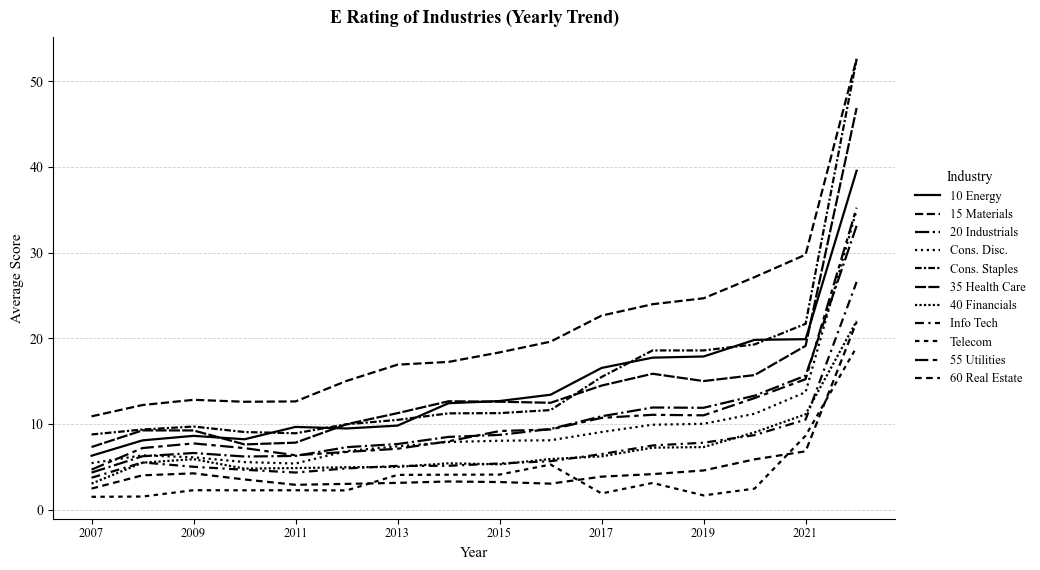

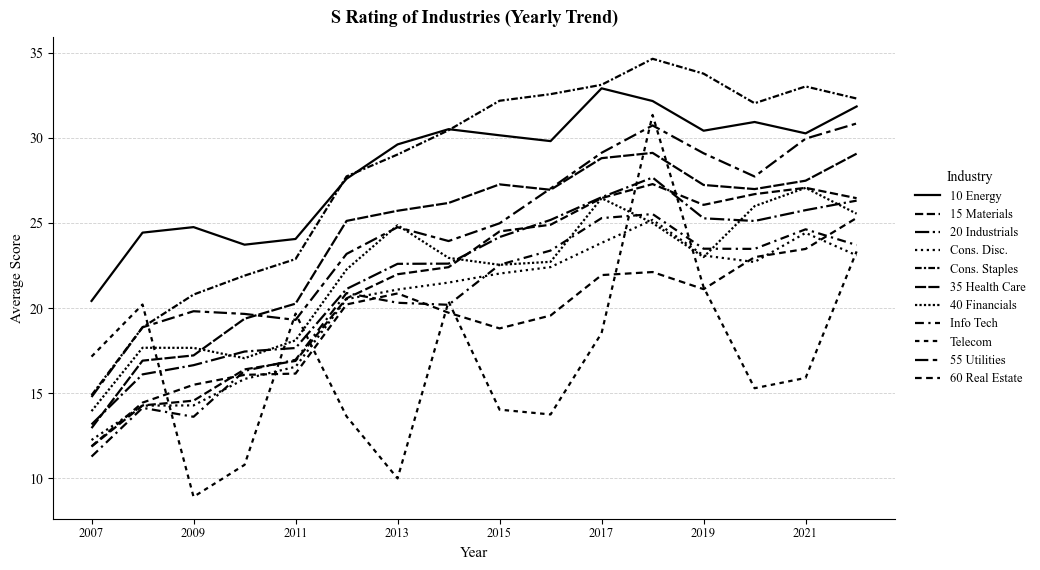

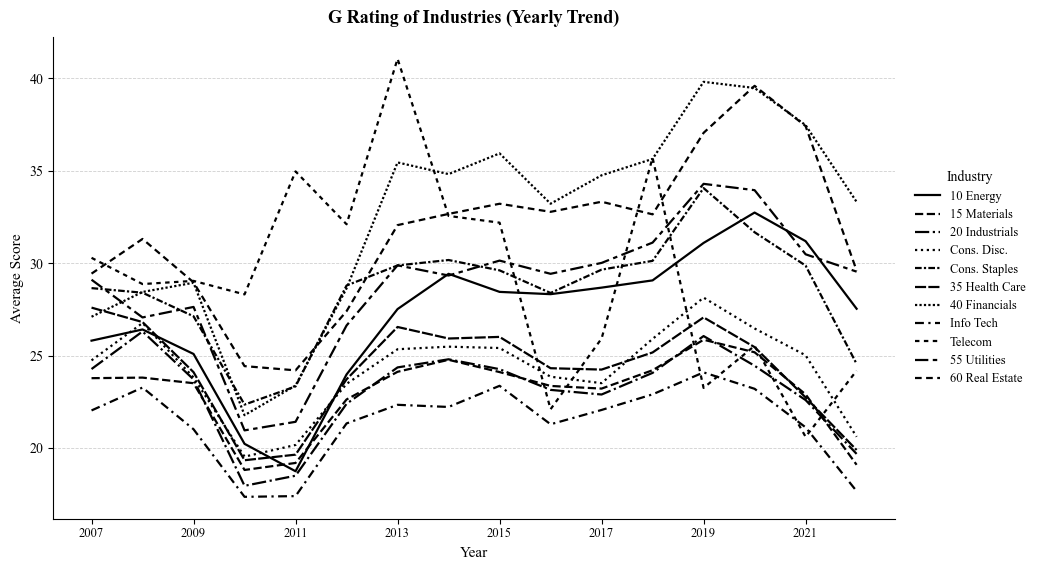

In [64]:
# E / S / G：按年份 + 可视化
E_yearly, E_trend = industry_yearly_rating(ESG_Stock_Info, "E_Score")
plot_yearly_trend(E_trend, title="E Rating of Industries (Yearly Trend)")

S_yearly, S_trend = industry_yearly_rating(ESG_Stock_Info, "S_Score")
plot_yearly_trend(S_trend, title="S Rating of Industries (Yearly Trend)")

G_yearly, G_trend = industry_yearly_rating(ESG_Stock_Info, "G_Score")
plot_yearly_trend(G_trend, title="G Rating of Industries (Yearly Trend)")


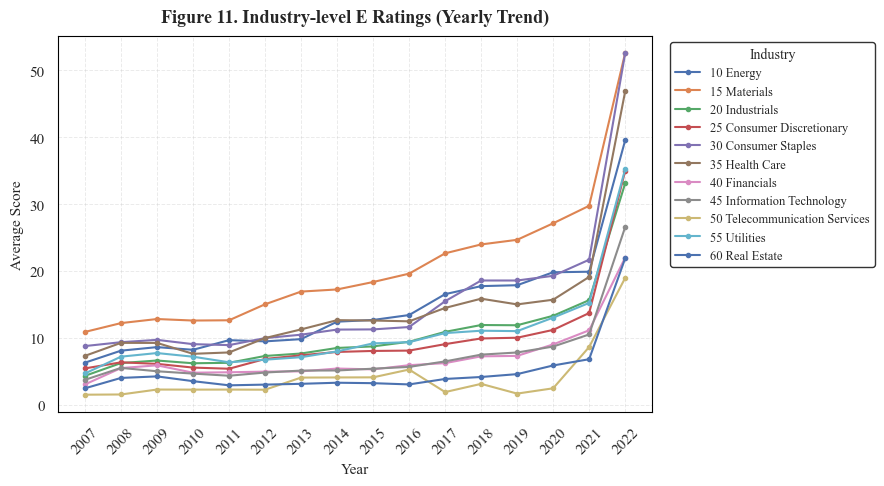

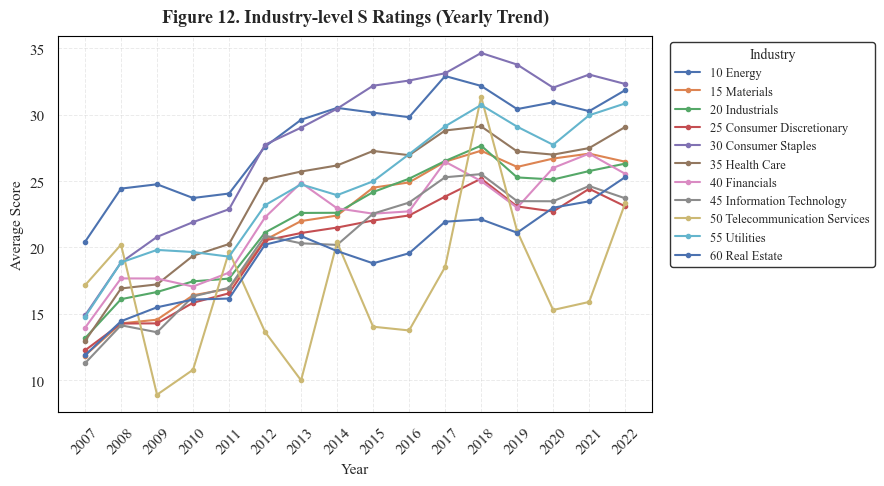

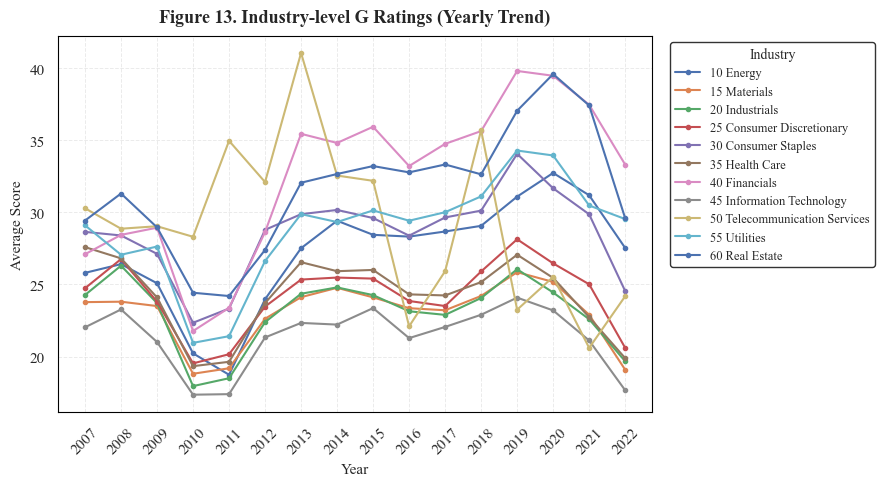

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# 统一风格
sns.set(style="whitegrid", font="Times New Roman")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.8
plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.edgecolor"] = "black"
plt.rcParams["font.size"] = 11

def plot_yearly_trend_academic(trend_table, title):
    """ESG年度趋势图 - 学术期刊风格"""
    plt.figure(figsize=(9, 5))
    for col in trend_table.columns:
        plt.plot(
            trend_table.index, trend_table[col],
            marker="o", markersize=3, linewidth=1.5, label=col
        )
    
    plt.title(title, fontsize=13, fontweight="bold", pad=10)
    plt.xlabel("Year", fontsize=11)
    plt.ylabel("Average Score", fontsize=11)
    plt.xticks(trend_table.index, rotation=45)
    plt.grid(alpha=0.4, linestyle="--", linewidth=0.7)
    plt.legend(
        title="Industry",
        bbox_to_anchor=(1.02, 1),
        loc="upper left",
        fontsize=9,
        title_fontsize=10,
        frameon=True
    )
    plt.tight_layout()
    plt.show()

# 绘图
plot_yearly_trend_academic(E_trend, "Figure 11. Industry-level E Ratings (Yearly Trend)")
plot_yearly_trend_academic(S_trend, "Figure 12. Industry-level S Ratings (Yearly Trend)")
plot_yearly_trend_academic(G_trend, "Figure 13. Industry-level G Ratings (Yearly Trend)")


In [67]:
# ESG 表格
print("====== E rating of industries：不同产业的E评级（总体平均） ======")
print(E_overall, "\n")

print("====== S rating of industries：不同产业的S评级（总体平均） ======")
print(S_overall, "\n")

print("====== G rating of industries：不同产业的G评级（总体平均） ======")
print(G_overall, "\n")

====== E rating of industries：不同产业的E评级（总体平均） ======
                           一级行业名称   AvgScore
1                    15 Materials  23.374508
4             30 Consumer Staples  17.910649
5                  35 Health Care  17.179152
0                       10 Energy  15.317454
2                  20 Industrials  12.663698
3       25 Consumer Discretionary  11.539998
9                    55 Utilities  11.460410
7       45 Information Technology   9.440139
6                   40 Financials   8.062801
8   50 Telecommunication Services   6.054426
10                 60 Real Estate   5.067201 

====== S rating of industries：不同产业的S评级（总体平均） ======
                           一级行业名称   AvgScore
4             30 Consumer Staples  29.669199
0                       10 Energy  28.836106
5                  35 Health Care  25.739593
9                    55 Utilities  25.301047
2                  20 Industrials  23.586195
1                    15 Materials  23.219378
6                   40 Financials  23.0

In [68]:
# 不同年份 E,S,G评级表格
print("====== E rating of industries：不同行业年度E评级趋势 ======")
print(E_trend, "\n")

print("====== S rating of industries：不同行业年度S评级趋势 ======")
print(S_trend, "\n")

print("====== G rating of industries：不同行业年度G评级趋势 ======")
print(G_trend, "\n")

====== E rating of industries：不同行业年度E评级趋势 ======
一级行业名称  10 Energy  15 Materials  20 Industrials  25 Consumer Discretionary  \
Year                                                                         
2007     6.280079     10.878295        4.310332                   5.417365   
2008     8.073630     12.198190        6.218579                   6.326975   
2009     8.601463     12.806609        6.599261                   6.096690   
2010     8.203014     12.580292        6.187460                   5.539812   
2011     9.644080     12.620077        6.256636                   5.367875   
2012     9.463215     15.012413        7.278973                   6.830419   
2013     9.796173     16.913126        7.647262                   7.375709   
2014    12.410195     17.233064        8.477694                   7.881564   
2015    12.666153     18.343538        8.710274                   8.030787   
2016    13.401625     19.596802        9.403694                   8.083139   
2017    16.5285

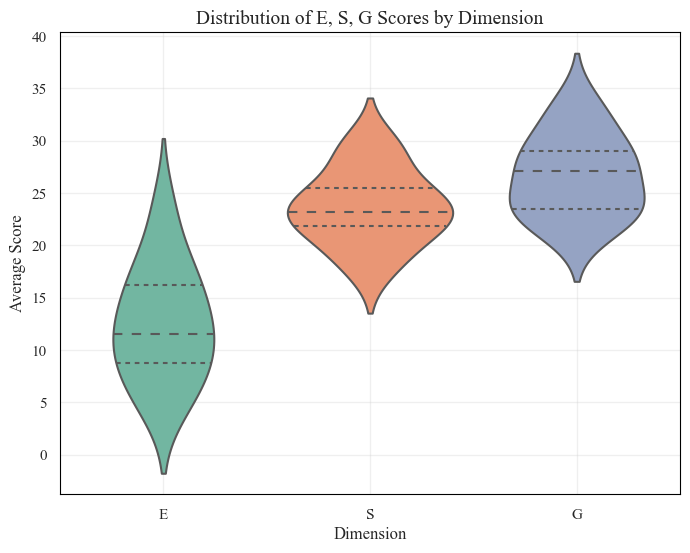

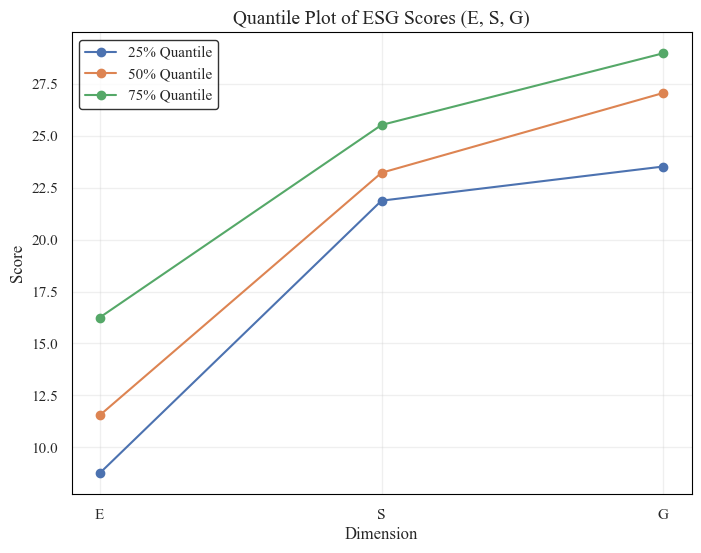

Quantile values:
         25%        50%        75%
E   8.751470  11.539998  16.248303
S  21.875492  23.219378  25.520320
G  23.519958  27.061921  28.973224


In [69]:
# Distribution plot
# 把三个结果拼成一个表格
df_plot = pd.concat([
    E_overall.assign(Dimension="E"),
    S_overall.assign(Dimension="S"),
    G_overall.assign(Dimension="G")
])

# 绘制分位图（用小提琴图可展示分布 + 中位数）
plt.figure(figsize=(8,6))
sns.violinplot(x="Dimension", y="AvgScore", data=df_plot, inner="quartile", palette="Set2")

plt.title("Distribution of E, S, G Scores by Dimension", fontsize=14)
plt.xlabel("Dimension", fontsize=12)
plt.ylabel("Average Score", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# 绘制IQR图
# 计算每个维度的分位数
quantiles = {}
for dim, df in zip(["E", "S", "G"], [E_overall, S_overall, G_overall]):
    q25 = np.percentile(df["AvgScore"], 25)
    q50 = np.percentile(df["AvgScore"], 50)  # 中位数
    q75 = np.percentile(df["AvgScore"], 75)
    quantiles[dim] = [q25, q50, q75]

# 转成 DataFrame
quantile_df = pd.DataFrame(quantiles, index=["25%", "50%", "75%"]).T

# 绘制分位数折线图
plt.figure(figsize=(8,6))
for q in quantile_df.columns:
    plt.plot(quantile_df.index, quantile_df[q], marker="o", label=f"{q} Quantile")

plt.title("Quantile Plot of ESG Scores (E, S, G)", fontsize=14)
plt.xlabel("Dimension", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("Quantile values:")
print(quantile_df)



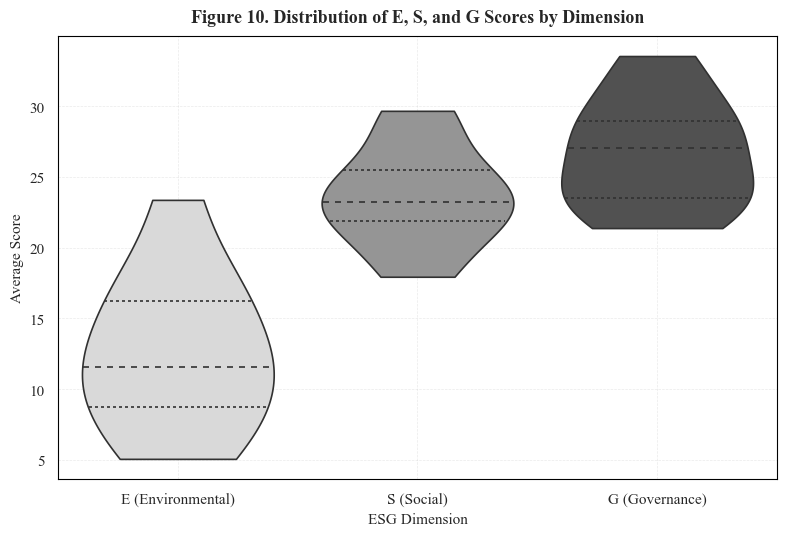

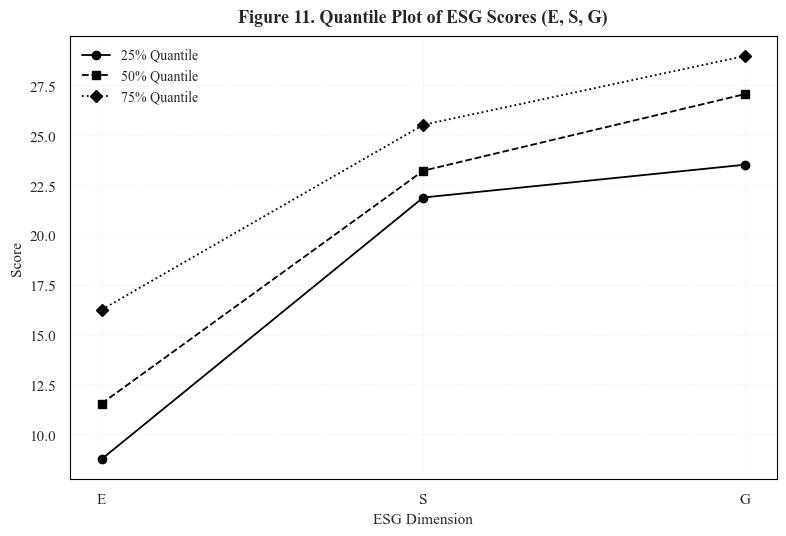

Quantile values:


,25%,50%,75%
E,8.75,11.54,16.25
S,21.88,23.22,25.52
G,23.52,27.06,28.97


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# =============================
# 合并 E / S / G 结果并标注维度
# =============================
df_plot = pd.concat([
    E_overall.assign(Dimension="E (Environmental)"),
    S_overall.assign(Dimension="S (Social)"),
    G_overall.assign(Dimension="G (Governance)")
])

# =============================
# Figure 11: 黑白小提琴图
# =============================
plt.figure(figsize=(8, 5.5))
sns.violinplot(
    x="Dimension", y="AvgScore", data=df_plot,
    inner="quartile", palette="Greys",  # 使用灰阶色
    linewidth=1.2, cut=0, scale="width"
)

plt.title("Figure 10. Distribution of E, S, and G Scores by Dimension", fontsize=13, fontweight='bold', pad=10)
plt.xlabel("ESG Dimension", fontsize=11)
plt.ylabel("Average Score", fontsize=11)
plt.grid(alpha=0.4, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# =============================
# Figure 12: 黑白分位数折线图
# =============================

# 计算各维度的分位数
quantiles = {}
for dim, df in zip(["E", "S", "G"], [E_overall, S_overall, G_overall]):
    q25 = np.percentile(df["AvgScore"], 25)
    q50 = np.percentile(df["AvgScore"], 50)
    q75 = np.percentile(df["AvgScore"], 75)
    quantiles[dim] = [q25, q50, q75]

quantile_df = pd.DataFrame(quantiles, index=["25%", "50%", "75%"]).T

# 绘制折线图
plt.figure(figsize=(8, 5.5))
markers = ['o', 's', 'D']
linestyles = ['-', '--', ':']

for q, m, ls in zip(quantile_df.columns, markers, linestyles):
    plt.plot(
        quantile_df.index,
        quantile_df[q],
        marker=m,
        label=f"{q} Quantile",
        linestyle=ls,
        color='black',
        linewidth=1.3,
        markersize=6
    )

plt.title("Figure 11. Quantile Plot of ESG Scores (E, S, G)", fontsize=13, fontweight='bold', pad=10)
plt.xlabel("ESG Dimension", fontsize=11)
plt.ylabel("Score", fontsize=11)
plt.legend(frameon=False, fontsize=10)
plt.grid(alpha=0.3, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

print("Quantile values:")
display(quantile_df.round(2))


### Ranking Test

In [72]:
# ESG 排名表
print("====== E rating of industries：不同产业的E评级排名（总体平均） ======")
E_rank_overall = E_overall.copy()
E_rank_overall["Rank"] = E_rank_overall["AvgScore"].rank(ascending=False, method="min")
print(E_rank_overall.sort_values("Rank"), "\n")

print("====== S rating of industries：不同产业的S评级排名（总体平均） ======")
S_rank_overall = S_overall.copy()
S_rank_overall["Rank"] = S_rank_overall["AvgScore"].rank(ascending=False, method="min")
print(S_rank_overall.sort_values("Rank"), "\n")

print("====== G rating of industries：不同产业的G评级排名（总体平均） ======")
G_rank_overall = G_overall.copy()
G_rank_overall["Rank"] = G_rank_overall["AvgScore"].rank(ascending=False, method="min")
print(G_rank_overall.sort_values("Rank"), "\n")


====== E rating of industries：不同产业的E评级排名（总体平均） ======
                           一级行业名称   AvgScore  Rank
1                    15 Materials  23.374508   1.0
4             30 Consumer Staples  17.910649   2.0
5                  35 Health Care  17.179152   3.0
0                       10 Energy  15.317454   4.0
2                  20 Industrials  12.663698   5.0
3       25 Consumer Discretionary  11.539998   6.0
9                    55 Utilities  11.460410   7.0
7       45 Information Technology   9.440139   8.0
6                   40 Financials   8.062801   9.0
8   50 Telecommunication Services   6.054426  10.0
10                 60 Real Estate   5.067201  11.0 

====== S rating of industries：不同产业的S评级排名（总体平均） ======
                           一级行业名称   AvgScore  Rank
4             30 Consumer Staples  29.669199   1.0
0                       10 Energy  28.836106   2.0
5                  35 Health Care  25.739593   3.0
9                    55 Utilities  25.301047   4.0
2                  20 I

In [73]:
# 合并 E/S/G 排名到一个表
rank_df = E_rank_overall[["一级行业名称", "Rank"]].rename(columns={"Rank": "E_rank"})
rank_df = rank_df.merge(S_rank_overall[["一级行业名称", "Rank"]].rename(columns={"Rank": "S_rank"}), on="一级行业名称")
rank_df = rank_df.merge(G_rank_overall[["一级行业名称", "Rank"]].rename(columns={"Rank": "G_rank"}), on="一级行业名称")

# Spearman 秩相关
print("=== Spearman Rank Correlation ===")
print(rank_df[["E_rank", "S_rank", "G_rank"]].corr(method="spearman"), "\n")

# Kendall Tau 秩相关
print("=== Kendall Tau Rank Correlation ===")
print(rank_df[["E_rank", "S_rank", "G_rank"]].corr(method="kendall"), "\n")

# Spearman 检验
rho_es, p_es = spearmanr(rank_df["E_rank"], rank_df["S_rank"])
rho_eg, p_eg = spearmanr(rank_df["E_rank"], rank_df["G_rank"])
rho_sg, p_sg = spearmanr(rank_df["S_rank"], rank_df["G_rank"])

print(f"Spearman E vs S: rho={rho_es:.3f}, p={p_es:.3f}")
print(f"Spearman E vs G: rho={rho_eg:.3f}, p={p_eg:.3f}")
print(f"Spearman S vs G: rho={rho_sg:.3f}, p={p_sg:.3f}\n")

# Kendall 检验
tau_es, p_es_k = kendalltau(rank_df["E_rank"], rank_df["S_rank"])
tau_eg, p_eg_k = kendalltau(rank_df["E_rank"], rank_df["G_rank"])
tau_sg, p_sg_k = kendalltau(rank_df["S_rank"], rank_df["G_rank"])

print(f"Kendall E vs S: tau={tau_es:.3f}, p={p_es_k:.3f}")
print(f"Kendall E vs G: tau={tau_eg:.3f}, p={p_eg_k:.3f}")
print(f"Kendall S vs G: tau={tau_sg:.3f}, p={p_sg_k:.3f}")


=== Spearman Rank Correlation ===
          E_rank    S_rank    G_rank
E_rank  1.000000  0.754545 -0.390909
S_rank  0.754545  1.000000  0.018182
G_rank -0.390909  0.018182  1.000000 

=== Kendall Tau Rank Correlation ===
          E_rank    S_rank    G_rank
E_rank  1.000000  0.563636 -0.272727
S_rank  0.563636  1.000000  0.018182
G_rank -0.272727  0.018182  1.000000 

Spearman E vs S: rho=0.755, p=0.007
Spearman E vs G: rho=-0.391, p=0.235
Spearman S vs G: rho=0.018, p=0.958

Kendall E vs S: tau=0.564, p=0.017
Kendall E vs G: tau=-0.273, p=0.283
Kendall S vs G: tau=0.018, p=1.000


=== Spearman Rank Correlation Matrix ===
        E_rank  S_rank  G_rank
E_rank   1.000   0.755  -0.391
S_rank   0.755   1.000   0.018
G_rank  -0.391   0.018   1.000 

=== Kendall Tau Rank Correlation Matrix ===
        E_rank  S_rank  G_rank
E_rank   1.000   0.564  -0.273
S_rank   0.564   1.000   0.018
G_rank  -0.273   0.018   1.000 

=== Pairwise Rank Correlation Summary ===
     Pair  Spearman_rho  Spearman_p Spearman_sig  Kendall_tau  Kendall_p  \
0  E vs S         0.755       0.007          ***        0.564      0.017   
1  E vs G        -0.391       0.235                    -0.273      0.283   
2  S vs G         0.018       0.958                     0.018      1.000   

  Kendall_sig  N_industries  
0          **            11  
1                        11  
2                        11   

=== Pairwise Summary with Holm–Bonferroni Adjusted p-values ===
     Pair  Spearman_rho  Spearman_p  Spearman_p_adj  Kendall_tau  Kendall_p  \
0  E vs S         0.755       0.007           0.022

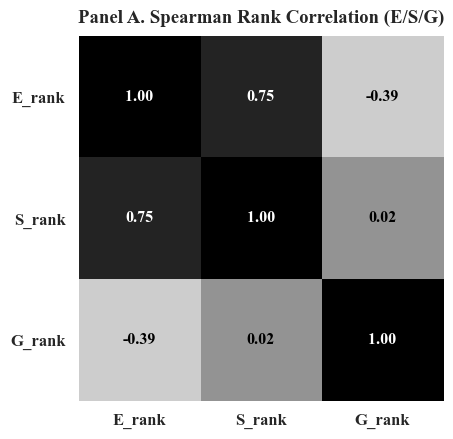

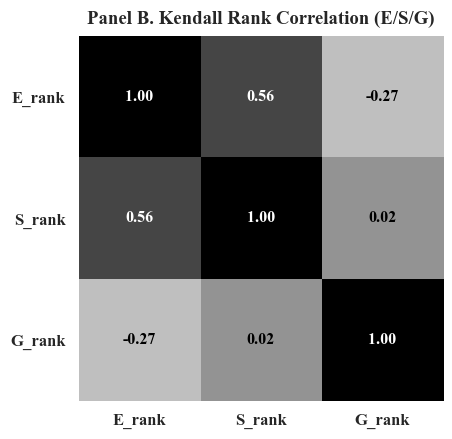

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import spearmanr, kendalltau, chi2

# ============ 0) Matplotlib 学术风（黑白打印友好） ============
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["axes.unicode_minus"] = False
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False

# ============ 1) 合并排名数据（保留行业名 + 各维度平均分与排名） ============
def _std_cols(df, score_col="AvgScore", name_col="一级行业名称", rank_col="Rank", prefix="E"):
    keep = {}
    # 自动兜底
    if name_col not in df.columns:
        # 兼容英文
        name_col = "Industry" if "Industry" in df.columns else df.columns[0]
    if score_col not in df.columns:
        score_col = [c for c in df.columns if "Avg" in c or "Score" in c][0]
    if rank_col not in df.columns:
        rank_col = [c for c in df.columns if "Rank" in c][0]
    keep[f"{prefix}_score"] = df[score_col].astype(float).values
    keep[f"{prefix}_rank"] = df[rank_col].astype(int).values
    keep["Industry"] = df[name_col].values
    out = pd.DataFrame(keep)
    return out[["Industry", f"{prefix}_score", f"{prefix}_rank"]]

E_std = _std_cols(E_rank_overall, prefix="E")
S_std = _std_cols(S_rank_overall, prefix="S")
G_std = _std_cols(G_rank_overall, prefix="G")

rank_df = (
    E_std.merge(S_std, on="Industry").merge(G_std, on="Industry")
    .sort_values("E_rank")
    .reset_index(drop=True)
)

# 可选：导出整洁版排名表（Appendix Table A8）
rank_df_out = rank_df.copy()
rank_df_out = rank_df_out[[
    "Industry", "E_score", "E_rank", "S_score", "S_rank", "G_score", "G_rank"
]]
rank_df_out.to_csv("Appendix_Table_A8_ESG_Rankings.csv", index=False)

# ============ 2) 相关矩阵（Spearman & Kendall） ============
corr_s = rank_df[["E_rank", "S_rank", "G_rank"]].corr(method="spearman")
corr_k = rank_df[["E_rank", "S_rank", "G_rank"]].corr(method="kendall")

print("=== Spearman Rank Correlation Matrix ===")
print(corr_s.round(3), "\n")
print("=== Kendall Tau Rank Correlation Matrix ===")
print(corr_k.round(3), "\n")

# ============ 3) 成对相关的“汇总表”（含rho/tau、p 值、显著性） ============
pairs = [("E_rank","S_rank"), ("E_rank","G_rank"), ("S_rank","G_rank")]

def p_stars(p):
    return "***" if p < 0.01 else "**" if p < 0.05 else "*" if p < 0.1 else ""

rows = []
for a,b in pairs:
    rho,  p_r = spearmanr(rank_df[a], rank_df[b])
    tau,  p_t = kendalltau(rank_df[a], rank_df[b])
    rows.append({
        "Pair": f"{a.replace('_rank','')} vs {b.replace('_rank','')}",
        "Spearman_rho": rho, "Spearman_p": p_r, "Spearman_sig": p_stars(p_r),
        "Kendall_tau": tau, "Kendall_p": p_t, "Kendall_sig": p_stars(p_t),
        "N_industries": rank_df.shape[0]
    })
pair_summary = pd.DataFrame(rows)
print("=== Pairwise Rank Correlation Summary ===")
print(pair_summary.round(3), "\n")

# 可选：多重检验校正（Holm-Bonferroni）
def holm_bonferroni(pvals):
    m = len(pvals)
    order = np.argsort(pvals)
    adj = np.empty(m)
    for k, idx in enumerate(order):
        adj[idx] = min((m-k) * pvals[idx], 1.0)
    return adj

pair_summary["Spearman_p_adj"] = holm_bonferroni(pair_summary["Spearman_p"].values)
pair_summary["Kendall_p_adj"]  = holm_bonferroni(pair_summary["Kendall_p"].values)
print("=== Pairwise Summary with Holm–Bonferroni Adjusted p-values ===")
print(pair_summary[["Pair","Spearman_rho","Spearman_p","Spearman_p_adj","Kendall_tau","Kendall_p","Kendall_p_adj","N_industries"]].round(3), "\n")

# 导出 Appendix Table A9（汇总表）
pair_summary.to_csv("Appendix_Table_A9_Rank_Correlation_Summary.csv", index=False)

# ============ 4) Kendall’s W（总体一致性检验，三维度共同对行业排序） ============
# W = 12 * sum_i (R_i - Rbar)^2 / (m^2 * (n^3 - n)), m=评委个数(3个维度)，n=被排序对象数(行业数)
R = rank_df[["E_rank","S_rank","G_rank"]].values   # n x m
n, m = R.shape
R_i = R.sum(axis=1)                  # 每个行业的总名次
Rbar = R_i.mean()
S = np.sum((R_i - Rbar)**2)
W = 12*S / (m**2 * (n**3 - n))
# 近似卡方检验：chi2 = m*(n-1)*W, df = n-1
chi2_stat = m*(n-1)*W
p_w = 1 - chi2.cdf(chi2_stat, df=n-1)

print(f"Kendall's W (overall concordance across E/S/G): W={W:.3f}, chi2={chi2_stat:.3f}, df={n-1}, p={p_w:.3f}\n")

# ============ 5) 学术黑白风热力图（Appendix Figure A6） ============

def corr_heatmap(M, title, fig_label=None):
    fig, ax = plt.subplots(figsize=(5.2, 4.5))

    # 反色灰度调色，更利于黑白打印
    im = ax.imshow(M.values, cmap="Greys", vmin=-1, vmax=1)

    # 刻度标签
    ax.set_xticks(range(M.shape[1]))
    ax.set_xticklabels(M.columns, fontsize=12, fontweight="bold")
    ax.set_yticks(range(M.shape[0]))
    ax.set_yticklabels(M.index, fontsize=12, fontweight="bold")

    # 在每个格子上显示相关系数值
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            val = M.values[i, j]
            # 黑白底自动判断文字颜色
            color = "black" if abs(val) < 0.5 else "white"
            ax.text(
                j, i, f"{val:.2f}",
                ha="center", va="center",
                fontsize=11.5, color=color, fontweight="semibold"
            )

    # 添加图标题（带编号）
    if fig_label:
        ax.set_title(
            f"Figure {fig_label}. {title}",
            fontsize=13.5, fontweight="bold", pad=10
        )
    else:
        ax.set_title(title, fontsize=13.5, fontweight="bold", pad=10)

    # 调整边框与网格
    ax.spines[:].set_visible(False)
    ax.tick_params(axis="x", rotation=0)
    ax.grid(False)

    # 保证矩阵方正显示
    ax.set_aspect("equal")
    fig.tight_layout(pad=1.0)
    plt.show()



corr_heatmap(corr_s, "Panel A. Spearman Rank Correlation (E/S/G)")
corr_heatmap(corr_k, "Panel B. Kendall Rank Correlation (E/S/G)")

# ============ 6) 小贴士（供正文/附录写作用） ============
# 你可以引用：
# - “Spearman ρ(E,S)=0.755 (p=0.007; Holm-Bonferroni adj p=...), Kendall τ(E,S)=0.564 (p=0.017)”
# - “Kendall’s W = {W:.3f}, p = {p_w:.3f}，表明三维度在行业层面的总体一致性有限/中等/显著（按p解释）”


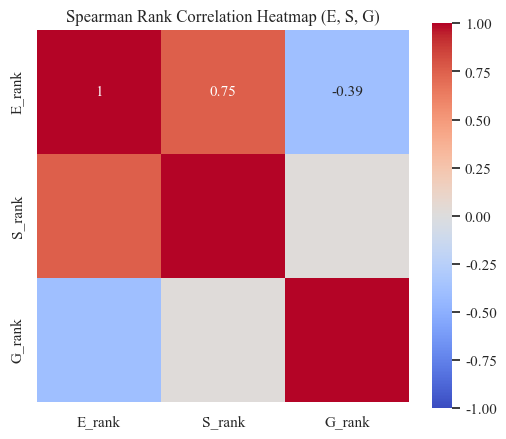

In [75]:
corr_matrix = rank_df[["E_rank", "S_rank", "G_rank"]].corr(method="spearman")

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1, square=True, cbar=True)
plt.title("Spearman Rank Correlation Heatmap (E, S, G)")
plt.show()


In [77]:
print(rank_df)
# 对每个行业计算排名方差和极差
rank_df["Avg_rank"] = rank_df[["E_rank", "S_rank", "G_rank"]].mean(axis=1).round(2)
rank_df["Rank_std"] = rank_df[["E_rank", "S_rank", "G_rank"]].std(axis=1).round(2)
rank_df["Rank_range"] = rank_df[["E_rank", "S_rank", "G_rank"]].max(axis=1) - \
                        rank_df[["E_rank", "S_rank", "G_rank"]].min(axis=1)

# 排序，找出一致性最高/最低的行业
result = rank_df.sort_values("Rank_std")

print("====== 行业排名一致性（方差 & 极差） ======")
print(result[["Industry", "Rank_std", "Rank_range", "Avg_rank"]])


                         Industry    E_score  E_rank    S_score  S_rank  \
0                    15 Materials  23.374508       1  23.219378       6   
1             30 Consumer Staples  17.910649       2  29.669199       1   
2                  35 Health Care  17.179152       3  25.739593       3   
3                       10 Energy  15.317454       4  28.836106       2   
4                  20 Industrials  12.663698       5  23.586195       5   
5       25 Consumer Discretionary  11.539998       6  21.476153       9   
6                    55 Utilities  11.460410       7  25.301047       4   
7       45 Information Technology   9.440139       8  22.274831       8   
8                   40 Financials   8.062801       9  23.001061       7   
9   50 Telecommunication Services   6.054426      10  17.941357      11   
10                 60 Real Estate   5.067201      11  19.508270      10   

      G_score  G_rank  
0   23.024634       9  
1   28.799171       4  
2   24.015282       8  
3  

In [78]:
# From score to Rank
# 按行计算排名（每年内部的排名，分数高=排名1）
E_rank = E_trend.rank(axis=1, ascending=False, method="min")
S_rank = S_trend.rank(axis=1, ascending=False, method="min")
G_rank = G_trend.rank(axis=1, ascending=False, method="min")

print("===== E rating ranks by industry =====")
print(E_rank, "\n")

print("===== S rating ranks by industry =====")
print(S_rank, "\n")

print("===== G rating ranks by industry =====")
print(G_rank, "\n")


===== E rating ranks by industry =====
一级行业名称  10 Energy  15 Materials  20 Industrials  25 Consumer Discretionary  \
Year                                                                         
2007          4.0           1.0             7.0                        5.0   
2008          4.0           1.0             7.0                        6.0   
2009          4.0           1.0             6.0                        7.0   
2010          3.0           1.0             6.0                        7.0   
2011          2.0           1.0             6.0                        7.0   
2012          4.0           1.0             5.0                        6.0   
2013          4.0           1.0             5.0                        6.0   
2014          3.0           1.0             5.0                        7.0   
2015          2.0           1.0             6.0                        7.0   
2016          2.0           1.0             5.0                        7.0   
2017          2.0        

In [79]:

from scipy.stats import entropy

def rank_stability(rank_df: pd.DataFrame, name: str):
    """
    rank_df: 行=Year，列=行业，值=该年的排名（1=最好）
    返回：每个行业跨年份的稳定性指标
    """
    out = []
    for col in rank_df.columns:
        r = rank_df[col].dropna()  # 有些年份没排名时先丢掉
        # 方差/标准差（越小越稳定）
        var_pop = np.var(r.values, ddof=0)          # 总体方差
        std_pop = np.std(r.values, ddof=0)          # 总体标准差
        # 极差（越小越稳定）
        r_range = r.max() - r.min()
        # 熵（按各名次出现的频率；越低越稳定）
        p = r.value_counts(normalize=True).sort_index()
        H = entropy(p.values, base=2)               # 以 bit 计
        out.append([col, var_pop, std_pop, r_range, H])

    res = pd.DataFrame(out, columns=["一级行业名称", 
                                     f"{name}_Var", 
                                     f"{name}_Std", 
                                     f"{name}_Range", 
                                     f"{name}_Entropy_bits"])
    return res
# 基于你现有的 rank_stability(...)、E_rank / S_rank / G_rank

# 1) 计算稳定性指标（已在你代码中）
E_stab = rank_stability(E_rank, "E")
S_stab = rank_stability(S_rank, "S")
G_stab = rank_stability(G_rank, "G")

# 2) 合并为一张“总表”
stab_all = (
    E_stab.merge(S_stab, on="一级行业名称")
          .merge(G_stab, on="一级行业名称")
)

# 3) 整理列顺序、数值格式
cols = ["一级行业名称",
        "E_Std","S_Std","G_Std",
        "E_Range","S_Range","G_Range",
        "E_Entropy_bits","S_Entropy_bits","G_Entropy_bits"]
stab_table = stab_all.rename(columns={
    "E_Std":"E_Std","S_Std":"S_Std","G_Std":"G_Std",
    "E_Range":"E_Range","S_Range":"S_Range","G_Range":"G_Range",
    "E_Entropy_bits":"E_Entropy_bits",
    "S_Entropy_bits":"S_Entropy_bits",
    "G_Entropy_bits":"G_Entropy_bits"
})[cols].copy()

# 四舍五入美化
for c in ["E_Std","S_Std","G_Std","E_Entropy_bits","S_Entropy_bits","G_Entropy_bits"]:
    stab_table[c] = stab_table[c].astype(float).round(3)
for c in ["E_Range","S_Range","G_Range"]:
    stab_table[c] = stab_table[c].astype(float).round(0).astype(int)

# 4) 排序（可按稳定性综合排序：先按总Std之和、再按总Range之和）
stab_table["Std_sum"]   = stab_table[["E_Std","S_Std","G_Std"]].sum(axis=1)
stab_table["Range_sum"] = stab_table[["E_Range","S_Range","G_Range"]].sum(axis=1)
stab_table = stab_table.sort_values(["Std_sum","Range_sum","一级行业名称"]).drop(columns=["Std_sum","Range_sum"]).reset_index(drop=True)

print(stab_table)

                           一级行业名称  E_Std  S_Std  G_Std  E_Range  S_Range  \
0                  20 Industrials  0.781  0.658  0.583        2        2   
1       45 Information Technology  0.500  1.368  0.331        1        4   
2       25 Consumer Discretionary  0.599  0.857  0.808        2        3   
3                    55 Utilities  0.661  0.696  0.935        2        2   
4             30 Consumer Staples  0.768  0.704  0.829        2        2   
5                  60 Real Estate  0.464  1.171  0.696        1        4   
6                    15 Materials  0.000  1.590  0.882        0        5   
7                  35 Health Care  0.750  1.111  0.827        2        4   
8                       10 Energy  0.827  0.496  1.446        2        1   
9                   40 Financials  0.500  1.685  1.379        1        6   
10  50 Telecommunication Services  0.464  3.495  3.706        1        9   

    G_Range  E_Entropy_bits  S_Entropy_bits  G_Entropy_bits  
0         2           1.4

In [81]:

# 如果想各维度分别看“最稳定/最不稳定”的行业：
def show_top_bottom(df, col, k=5):
    print(f"\n>>> {col} 最稳定（前{k}，数值越小越稳定）")
    print(df.sort_values(col).head(k)[["一级行业名称", col]])
    print(f"\n>>> {col} 最不稳定（后{k}）")
    print(df.sort_values(col, ascending=False).head(k)[["一级行业名称", col]])

show_top_bottom(E_stab, "E_Var")
show_top_bottom(S_stab, "S_Var")
show_top_bottom(G_stab, "G_Var")

# 若想得到一个“综合稳定性分数”（越小越稳定），可做一个简单加权平均：
weights = {"Var": 0.5, "Range": 0.25, "Entropy_bits": 0.25}  # 你可按需调整
combo = stab_all.copy()
combo["Stability_Score"] = (
    weights["Var"]   * (combo["E_Var"] + combo["S_Var"] + combo["G_Var"]) / 3
  + weights["Range"] * (combo["E_Range"] + combo["S_Range"] + combo["G_Range"]) / 3
  + weights["Entropy_bits"] * (combo["E_Entropy_bits"] + combo["S_Entropy_bits"] + combo["G_Entropy_bits"]) / 3
)
print("\n====== 综合稳定性（越小越稳定） ======")
print(combo[["一级行业名称","Stability_Score"]].sort_values("Stability_Score").head(10))



>>> E_Var 最稳定（前5，数值越小越稳定）
                           一级行业名称     E_Var
1                    15 Materials  0.000000
8   50 Telecommunication Services  0.214844
10                 60 Real Estate  0.214844
6                   40 Financials  0.250000
7       45 Information Technology  0.250000

>>> E_Var 最不稳定（后5）
                一级行业名称     E_Var
0            10 Energy  0.683594
2       20 Industrials  0.609375
4  30 Consumer Staples  0.589844
5       35 Health Care  0.562500
9         55 Utilities  0.437500

>>> S_Var 最稳定（前5，数值越小越稳定）
                      一级行业名称     S_Var
0                  10 Energy  0.246094
2             20 Industrials  0.433594
9               55 Utilities  0.484375
4        30 Consumer Staples  0.496094
3  25 Consumer Discretionary  0.734375

>>> S_Var 最不稳定（后5）
                           一级行业名称      S_Var
8   50 Telecommunication Services  12.214844
6                   40 Financials   2.839844
1                    15 Materials   2.527344
7       45 Information Technol